## Jupyter notebook for STA2101 Final Project Analysis of Sea-ice thickness.

### Since jupyter notebooks has a limited memory, the code required to make the plots will not be included here and will instead be included in the full code submitted. This will also limit the need for packages which also use memory.

#### Packages required

In [2]:
install.packages('caret', dependencies=TRUE)
install.packages("lmtest")
install.packages('mctest')

#install.packages('GGally')
#install.packages('car')
#install.packages('corpcor')

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fastmatch’, ‘progressr’, ‘SQUAREM’, ‘ParamHelpers’, ‘BBmisc’, ‘parallelMap’, ‘profileModel’, ‘plotrix’, ‘lava’, ‘styler’, ‘gplots’, ‘libcoin’, ‘mlr’, ‘doParallel’, ‘FNN’, ‘iterators’, ‘gower’, ‘timeDate’, ‘brglm’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘questionr’, ‘ROCR’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘ISwR’, ‘corpcor’, ‘ROSE’, ‘unbalanced’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘randomForest’, ‘RANN’, ‘spls’, ‘subselect’, ‘superpc’, ‘themis’


Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



In [3]:
library(zoo)
library(ggplot2)
library(lattice)
library(MASS)
library(caret)
library(lmtest)
library(mctest)
#library(GGally)
#library(corrplot)
#library(corpcor)
#library(ppcor)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




#### We begin by loading the data for each of the regions

In [4]:
reg1 <- read.csv('Data/JFM_TS_VARS_R1.csv')
reg2 <- read.csv('Data/JFM_TS_VARS_R2.csv')
reg3 <- read.csv('Data/JFM_TS_VARS_R3.csv')
reg4 <- read.csv('Data/JFM_TS_VARS_R4.csv')
reg5 <- read.csv('Data/JFM_TS_VARS_R5.csv')

#### We then standardize the data. Since all of the variables are measured in different units, in order to make meaningful comparisons of the impact of the explanatory variables on the outcome variable, we must remove the dependence on units. We standardize the data such that they have mean zero and a standard deviation of 1.

In [5]:
preproc1 <- preProcess(reg1[3:10], method=c("center", "scale"))
reg1_norm <- predict(preproc1,reg1[3:10])
reg1_norm["yrs"]<-reg1$yrs
reg1_norm <- subset(reg1_norm, select=-c(sic))
preproc2 <- preProcess(reg2[3:10], method=c("center", "scale"))
reg2_norm <- predict(preproc2,reg2[3:10])
reg2_norm["yrs"]<-reg2$yrs
reg2_norm <- subset(reg2_norm, select=-c(sic))
preproc3 <- preProcess(reg3[3:10], method=c("center", "scale"))
reg3_norm <- predict(preproc3,reg3[3:10])
reg3_norm["yrs"]<-reg3$yrs
reg3_norm <- subset(reg3_norm, select=-c(sic))
preproc4 <- preProcess(reg4[3:10], method=c("center", "scale"))
reg4_norm <- predict(preproc4,reg4[3:10])
reg4_norm["yrs"]<-reg4$yrs
reg4_norm <- subset(reg4_norm, select=-c(sic))
preproc5 <- preProcess(reg5[3:10], method=c("center", "scale"))
reg5_norm <- predict(preproc5,reg5[3:10])
reg5_norm["yrs"]<-reg5$yrs
reg5_norm <- subset(reg5_norm, select=-c(sic))
print("Summary for Standardized Region 1 Data")
summary(reg1_norm)
print("Summary for Standardized Region 2 Data")
summary(reg2_norm)
print("Summary for Standardized Region 3 Data")
summary(reg3_norm)
print("Summary for Standardized Region 4 Data")
summary(reg4_norm)
print("Summary for Standardized Region 5 Data")
summary(reg5_norm)

[1] "Summary for Standardized Region 1 Data"


      sit               sia                sig               sat          
 Min.   :-1.9434   Min.   :-1.91876   Min.   :-1.2369   Min.   :-1.83833  
 1st Qu.:-0.7691   1st Qu.:-0.58136   1st Qu.:-0.8314   1st Qu.:-0.74408  
 Median :-0.1437   Median :-0.03946   Median :-0.1656   Median : 0.01171  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.8555   3rd Qu.: 0.87442   3rd Qu.: 0.3936   3rd Qu.: 0.57933  
 Max.   : 2.0664   Max.   : 1.72639   Max.   : 2.3451   Max.   : 2.39639  
      slp               u10               v10                yrs      
 Min.   :-1.9580   Min.   :-1.8014   Min.   :-2.21362   Min.   :1988  
 1st Qu.:-0.8709   1st Qu.:-0.7483   1st Qu.:-0.50128   1st Qu.:1995  
 Median : 0.3798   Median :-0.1294   Median : 0.08208   Median :2002  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   :2002  
 3rd Qu.: 0.7750   3rd Qu.: 0.6917   3rd Qu.: 0.35719   3rd Qu.:2009  
 Max.   : 1.6431   Max.   : 1.9793   Max.   : 2.1

[1] "Summary for Standardized Region 2 Data"


      sit                sia               sig                sat          
 Min.   :-1.47661   Min.   :-2.2659   Min.   :-2.47907   Min.   :-1.66231  
 1st Qu.:-0.73086   1st Qu.:-0.5476   1st Qu.:-0.68187   1st Qu.:-0.69902  
 Median :-0.04302   Median :-0.1297   Median : 0.08124   Median : 0.02687  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.66127   3rd Qu.: 0.4389   3rd Qu.: 0.87868   3rd Qu.: 0.69142  
 Max.   : 2.91809   Max.   : 2.8186   Max.   : 1.57976   Max.   : 1.89508  
      slp                u10                 v10                yrs      
 Min.   :-1.88329   Min.   :-2.146047   Min.   :-2.36267   Min.   :1988  
 1st Qu.:-0.76214   1st Qu.:-0.448319   1st Qu.:-0.44860   1st Qu.:1995  
 Median : 0.04818   Median : 0.003743   Median :-0.05736   Median :2002  
 Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.00000   Mean   :2002  
 3rd Qu.: 0.74607   3rd Qu.: 0.813871   3rd Qu.: 0.43142   3rd Qu.:2009  
 Max.   : 1.91434   Max.

[1] "Summary for Standardized Region 3 Data"


      sit               sia               sig                sat          
 Min.   :-1.8846   Min.   :-1.9722   Min.   :-1.95200   Min.   :-1.86628  
 1st Qu.:-0.7427   1st Qu.:-0.6350   1st Qu.:-0.44377   1st Qu.:-0.65021  
 Median :-0.1177   Median : 0.2540   Median :-0.04482   Median : 0.09263  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.8059   3rd Qu.: 0.6749   3rd Qu.: 0.59319   3rd Qu.: 0.74412  
 Max.   : 1.6509   Max.   : 1.5297   Max.   : 3.44258   Max.   : 2.09400  
      slp               u10               v10                 yrs      
 Min.   :-2.3337   Min.   :-2.0438   Min.   :-1.515306   Min.   :1988  
 1st Qu.:-0.6320   1st Qu.:-0.8677   1st Qu.:-0.859843   1st Qu.:1995  
 Median : 0.1440   Median : 0.2303   Median : 0.001746   Median :2002  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000   Mean   :2002  
 3rd Qu.: 0.6044   3rd Qu.: 0.7287   3rd Qu.: 0.626757   3rd Qu.:2009  
 Max.   : 2.2286   Max.   : 1.7551   Max.  

[1] "Summary for Standardized Region 4 Data"


      sit               sia                sig                 sat         
 Min.   :-1.3911   Min.   :-2.56143   Min.   :-1.752795   Min.   :-1.6303  
 1st Qu.:-0.8008   1st Qu.:-0.55392   1st Qu.:-0.914092   1st Qu.:-0.6303  
 Median : 0.0495   Median : 0.01047   Median :-0.001692   Median :-0.2354  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.6455   3rd Qu.: 0.36243   3rd Qu.: 0.417600   3rd Qu.: 0.7235  
 Max.   : 2.4836   Max.   : 2.83597   Max.   : 1.897288   Max.   : 2.2201  
      slp                u10               v10                yrs      
 Min.   :-1.92537   Min.   :-1.8928   Min.   :-2.01593   Min.   :1988  
 1st Qu.:-0.61270   1st Qu.:-0.6464   1st Qu.:-0.50569   1st Qu.:1995  
 Median : 0.03833   Median : 0.0477   Median :-0.07903   Median :2002  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   :2002  
 3rd Qu.: 0.37619   3rd Qu.: 0.6666   3rd Qu.: 0.71181   3rd Qu.:2009  
 Max.   : 2.52884   Max.   : 1.7468 

[1] "Summary for Standardized Region 5 Data"


      sit               sia               sig                sat         
 Min.   :-1.5205   Min.   :-1.9517   Min.   :-1.77354   Min.   :-1.6527  
 1st Qu.:-0.8181   1st Qu.:-0.7477   1st Qu.:-0.63184   1st Qu.:-0.7494  
 Median :-0.0848   Median : 0.2156   Median :-0.07196   Median :-0.1926  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.3998   3rd Qu.: 0.6444   3rd Qu.: 0.45420   3rd Qu.: 0.6278  
 Max.   : 2.4726   Max.   : 1.4692   Max.   : 2.28848   Max.   : 2.3932  
      slp                u10               v10               yrs      
 Min.   :-2.10160   Min.   :-2.5294   Min.   :-2.1490   Min.   :1988  
 1st Qu.:-0.84657   1st Qu.:-0.3152   1st Qu.:-0.4648   1st Qu.:1995  
 Median : 0.07049   Median : 0.2191   Median : 0.0620   Median :2002  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   :2002  
 3rd Qu.: 0.72821   3rd Qu.: 0.6614   3rd Qu.: 0.6137   3rd Qu.:2009  
 Max.   : 1.77136   Max.   : 1.5076   Max.   : 2.1519   

#### We first build a linear model for all of the variables for each of the regions in order to assess whether a multiple regression model is appropriate. We have already identified that there are no indications that the independent and dependent variables have a non-linear relationship. Now, we want to investigate whether the assumptions of normality, homoscedasticity and independence are satisfied.


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + v10, data = reg1_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86407 -0.20448  0.02837  0.24324  0.64881 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.920e-16  7.277e-02   0.000 1.000000    
sia         -4.466e-01  1.376e-01  -3.246 0.003709 ** 
sig         -1.568e-01  9.393e-02  -1.669 0.109250    
sat         -6.621e-01  1.673e-01  -3.959 0.000667 ***
slp         -5.794e-02  8.424e-02  -0.688 0.498714    
u10          3.954e-01  9.483e-02   4.169 0.000399 ***
v10         -6.080e-02  1.261e-01  -0.482 0.634337    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3919 on 22 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.8464 
F-statistic: 26.72 on 6 and 22 DF,  p-value: 4.871e-09



	Shapiro-Wilk normality test

data:  fit1_prelim$resid
W = 0.98035, p-value = 0.8468



	studentized Breusch-Pagan test

data:  fit1_prelim
BP = 7.5797, df = 6, p-value = 0.2705


ERROR: Error in loadNamespace(name): there is no package called ‘car’


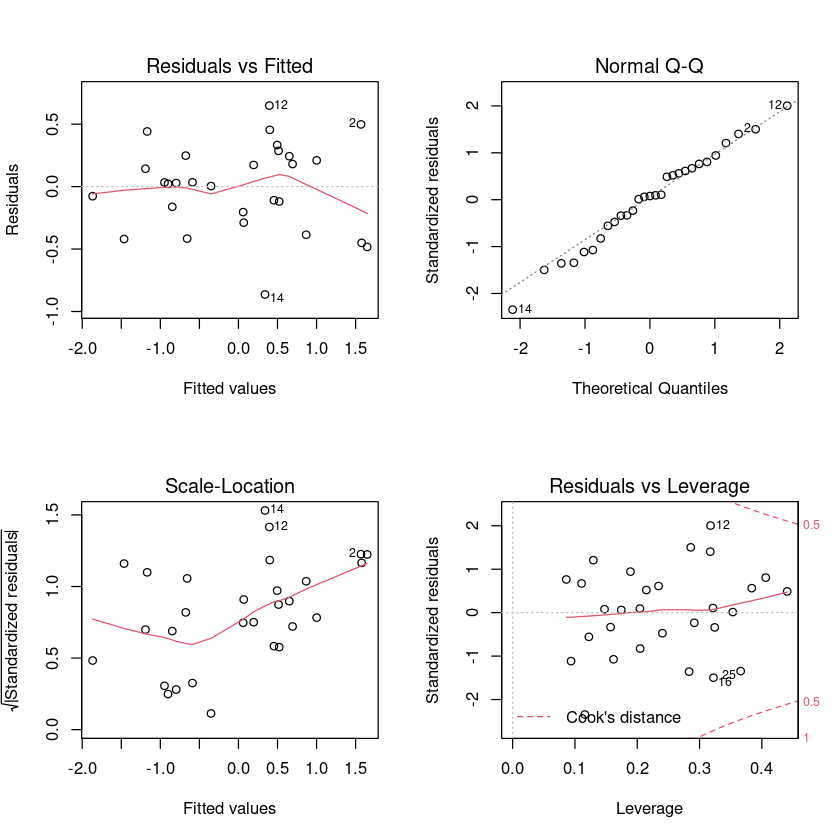

In [6]:
fit1_prelim <- lm(sit~sia + sig + sat + slp + u10 + v10, data=reg1_norm)
summary(fit1_prelim)

par(mfrow=c(2,2))
plot(fit1_prelim)

#Test normality
shapiro.test(fit1_prelim$resid)

# Test heterostescadisity 
bptest(fit1_prelim)

#Test multicollinearity
car::vif(fit1_prelim)


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + v10, data = reg2_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94261 -0.36756  0.02938  0.20857  0.98926 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.220e-15  9.354e-02   0.000   1.0000    
sia         -2.821e-01  1.717e-01  -1.643   0.1146    
sig         -1.177e-01  1.665e-01  -0.707   0.4869    
sat         -9.613e-01  1.251e-01  -7.684 1.15e-07 ***
slp         -3.184e-01  1.133e-01  -2.810   0.0102 *  
u10          1.029e-01  1.615e-01   0.637   0.5304    
v10          2.193e-01  1.578e-01   1.389   0.1786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5037 on 22 degrees of freedom
Multiple R-squared:  0.8006,	Adjusted R-squared:  0.7463 
F-statistic: 14.73 on 6 and 22 DF,  p-value: 1.03e-06



	Shapiro-Wilk normality test

data:  fit2_prelim$resid
W = 0.97139, p-value = 0.5978



	studentized Breusch-Pagan test

data:  fit2_prelim
BP = 9.2298, df = 6, p-value = 0.1611


ERROR: Error in loadNamespace(name): there is no package called ‘car’


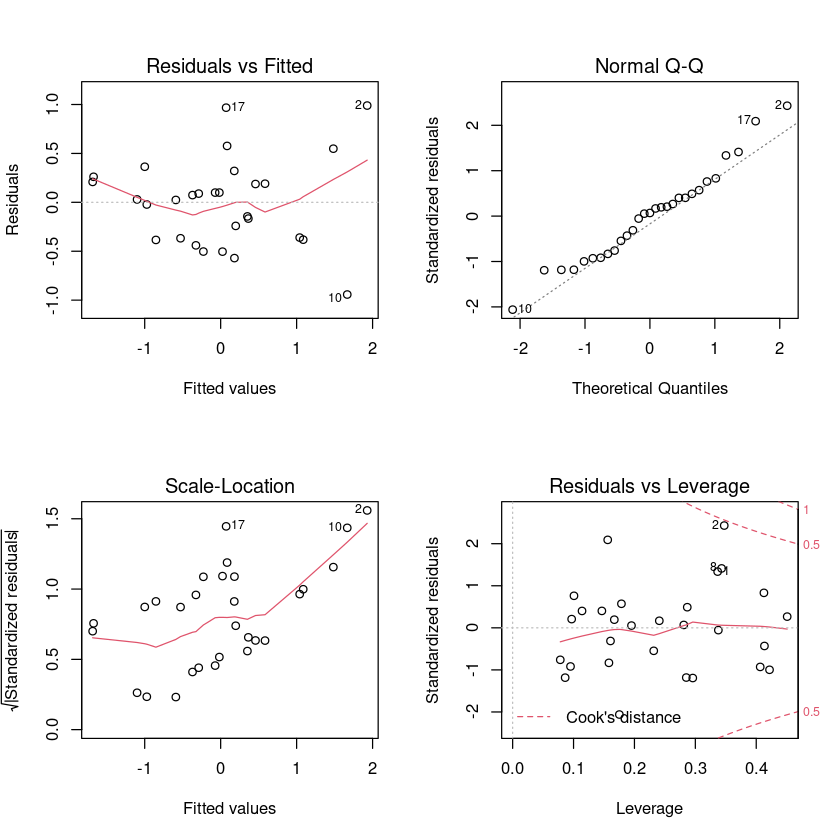

In [7]:
fit2_prelim <- lm(sit~sia + sig + sat + slp + u10 + v10, data=reg2_norm)
summary(fit2_prelim)

par(mfrow=c(2,2))
plot(fit2_prelim)

#Test normality
shapiro.test(fit2_prelim$resid)

# Test heterostescadisity 
bptest(fit2_prelim)

#Test multicollinearity
car::vif(fit2_prelim)

The R-squared value is high and the F-value is highly significant. These results suggest that the explanatory variables significantly explain the sea-ice thickness. However, only sea-ice advection, surface air temperature and the zonal wind component (U-wind) are significant at the 1% level of significance.


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + v10, data = reg3_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6804 -0.3132  0.1320  0.5643  0.9687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.650e-15  1.479e-01   0.000   1.0000  
sia         -8.121e-02  2.274e-01  -0.357   0.7244  
sig         -2.708e-01  1.818e-01  -1.489   0.1506  
sat         -3.688e-01  1.864e-01  -1.978   0.0605 .
slp         -5.059e-01  2.488e-01  -2.033   0.0543 .
u10          2.712e-02  2.339e-01   0.116   0.9087  
v10         -2.698e-01  1.782e-01  -1.514   0.1443  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7966 on 22 degrees of freedom
Multiple R-squared:  0.5014,	Adjusted R-squared:  0.3655 
F-statistic: 3.688 on 6 and 22 DF,  p-value: 0.01093



	Shapiro-Wilk normality test

data:  fit3_prelim$resid
W = 0.93412, p-value = 0.07039



	studentized Breusch-Pagan test

data:  fit3_prelim
BP = 6.5183, df = 6, p-value = 0.3677


ERROR: Error in loadNamespace(name): there is no package called ‘car’


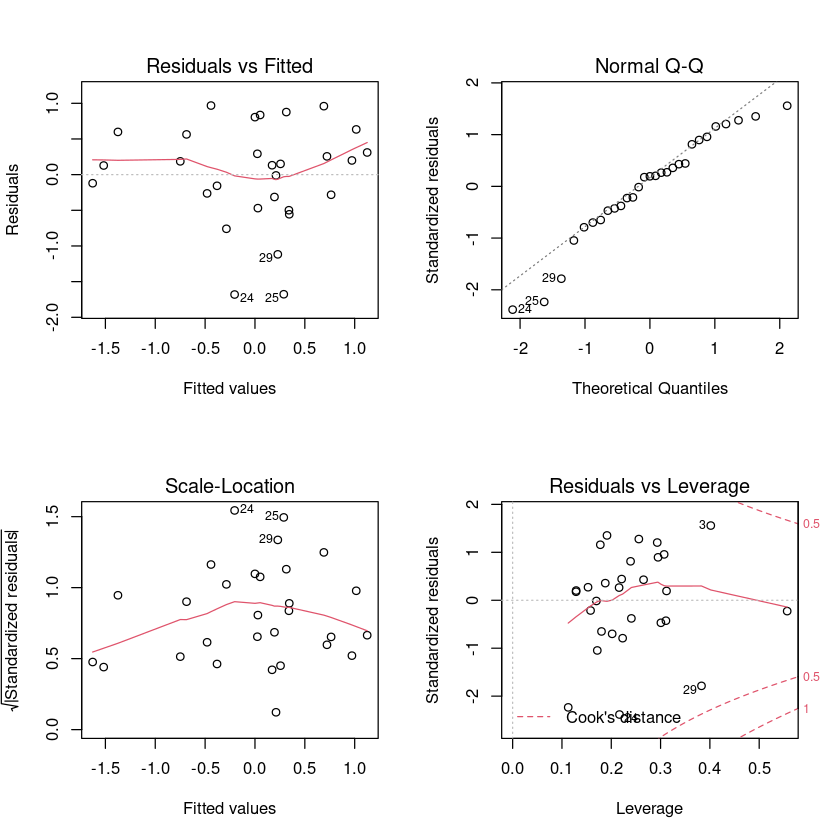

In [8]:
fit3_prelim <- lm(sit~sia + sig + sat + slp + u10 + v10, data=reg3_norm)
summary(fit3_prelim)

par(mfrow=c(2,2))
plot(fit3_prelim)

#Test normality
shapiro.test(fit3_prelim$resid)

# Test heterostescadisity 
bptest(fit3_prelim)

#Test multicollinearity
car::vif(fit3_prelim)


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + v10, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50503 -0.38874  0.00429  0.34727  1.40292 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.533e-15  1.309e-01   0.000  1.00000   
sia         -1.340e-01  1.978e-01  -0.678  0.50515   
sig         -1.081e-01  1.628e-01  -0.664  0.51355   
sat         -6.370e-01  1.742e-01  -3.657  0.00139 **
slp         -5.177e-01  1.883e-01  -2.749  0.01171 * 
u10          9.452e-02  2.063e-01   0.458  0.65133   
v10          1.052e-02  1.995e-01   0.053  0.95841   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7051 on 22 degrees of freedom
Multiple R-squared:  0.6094,	Adjusted R-squared:  0.5029 
F-statistic:  5.72 on 6 and 22 DF,  p-value: 0.00104



	Shapiro-Wilk normality test

data:  fit4_prelim$resid
W = 0.98212, p-value = 0.8885



	studentized Breusch-Pagan test

data:  fit4_prelim
BP = 6.1071, df = 6, p-value = 0.4113


ERROR: Error in loadNamespace(name): there is no package called ‘car’


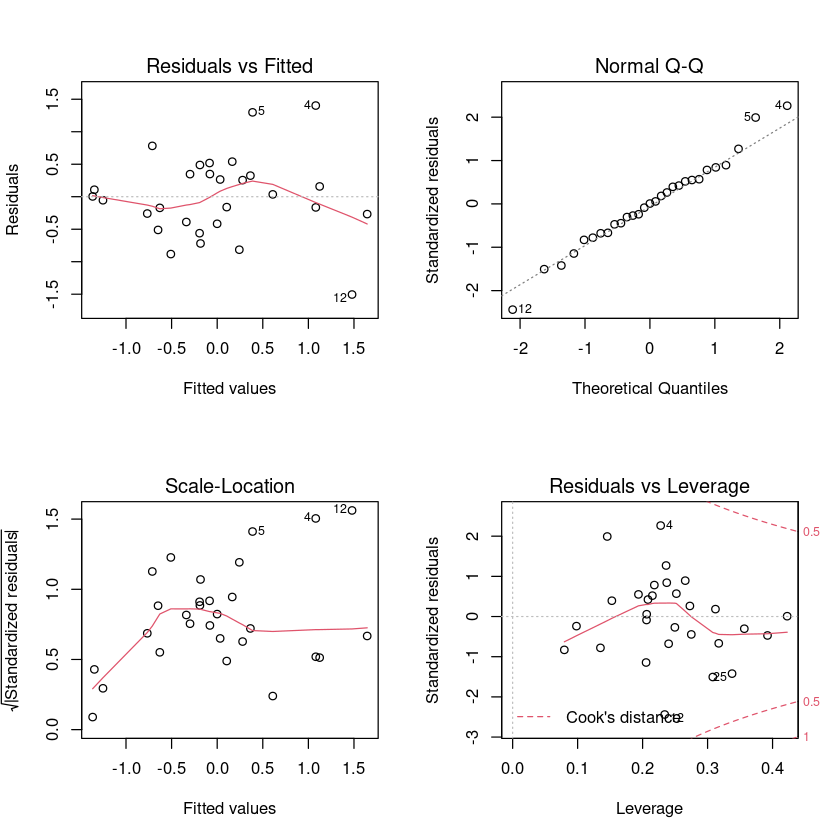

In [9]:
fit4_prelim <- lm(sit~sia + sig + sat + slp + u10 + v10, data=reg4_norm)
summary(fit4_prelim)

par(mfrow=c(2,2))
plot(fit4_prelim)

#Test normality
shapiro.test(fit4_prelim$resid)

# Test heterostescadisity 
bptest(fit4_prelim)

#Test multicollinearity
car::vif(fit4_prelim)


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + v10, data = reg5_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9477 -0.3330 -0.1161  0.2516  1.2596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  6.331e-16  1.130e-01   0.000  1.00000   
sia         -5.591e-01  1.871e-01  -2.988  0.00678 **
sig         -6.069e-01  1.967e-01  -3.086  0.00540 **
sat         -5.362e-01  1.508e-01  -3.556  0.00177 **
slp          4.042e-01  2.027e-01   1.994  0.05874 . 
u10          5.237e-01  2.276e-01   2.301  0.03123 * 
v10         -1.371e-01  1.553e-01  -0.883  0.38677   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6083 on 22 degrees of freedom
Multiple R-squared:  0.7092,	Adjusted R-squared:  0.6299 
F-statistic: 8.943 on 6 and 22 DF,  p-value: 5.278e-05



	Shapiro-Wilk normality test

data:  fit5_prelim$resid
W = 0.95338, p-value = 0.2238



	studentized Breusch-Pagan test

data:  fit5_prelim
BP = 6.0843, df = 6, p-value = 0.4138


ERROR: Error in loadNamespace(name): there is no package called ‘car’


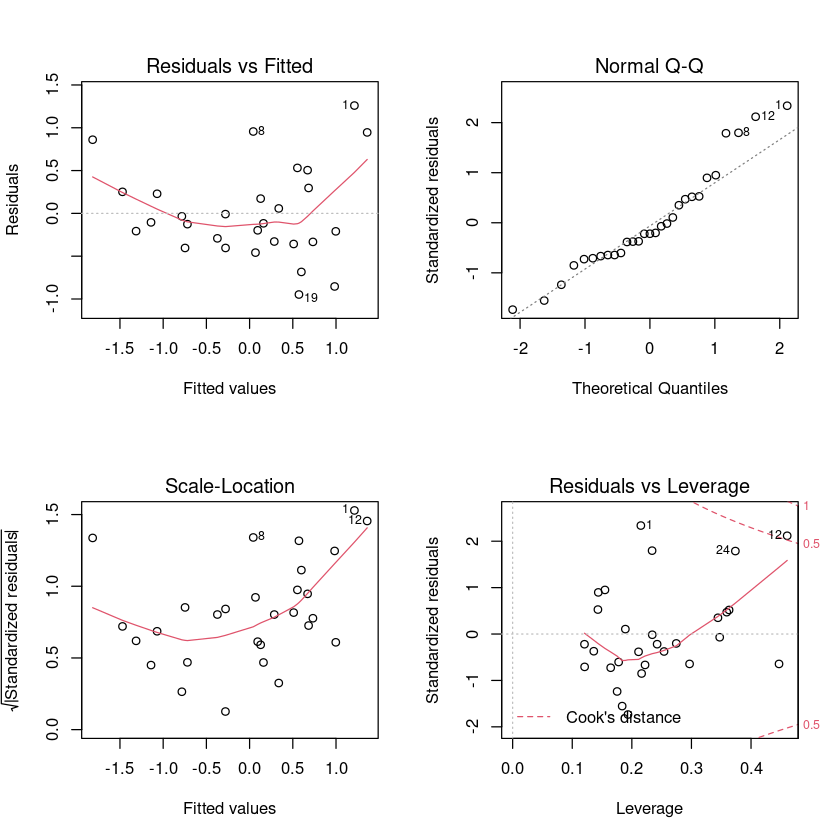

In [10]:
fit5_prelim <- lm(sit~sia + sig + sat + slp + u10 + v10, data=reg5_norm)
summary(fit5_prelim)

par(mfrow=c(2,2))
plot(fit5_prelim)

#Test normality
shapiro.test(fit5_prelim$resid)

# Test heterostescadisity 
bptest(fit5_prelim)

#Test multicollinearity
car::vif(fit5_prelim)

### We will not delve into the specific results of the models for the regions at this point; however, we identify that the assumption that is consistently violated for all of the models is the condition of independence of explanatory variables. We will specifically consider a conservative variance inflation factor (VIF) cutoff of 2.5. Given that the data are environmental variables, we expect there to be some level of correlation between variables that at times may be strong. This is the first issue that should be addressed for this dataset.

### The diagnostic plots and normality/variance tests indicate that some other assumptions may be violated by the data, but the correlation of the data may be inflating the standard error of the estimates and the significance of variables, so it should be treated first as it is consistent for the data.

### We will begin by taking a conservative approach to removing variables. We will first remove variables that exceed the cutoff vif of 2.5. If multiple variables exceed this vif, the variable with the largest vif will be removed. We will also ensure that none of the variables exceed the theoretical F-value for the Farrar-Glauber F-test which is calculated for the model and is included in the column entitled "Wi". We will use a theoretical F-value at the 5% significance level using the appropriate number of degrees of freedom k for the given iteration. The appropriate f-values are found using an f-distribution table.

In [11]:
omcdiag(fit1_prelim)
imcdiag(fit1_prelim)
fit1_prelim2 <- lm(sit~sia + sig + slp + u10 +v10 , data=reg1_norm)
omcdiag(fit1_prelim2)
imcdiag(fit1_prelim2)
fit1_prelim3 <- lm(sit~sig  + slp + u10 +v10 , data=reg1_norm)
omcdiag(fit1_prelim3)
imcdiag(fit1_prelim3)
final_fit1 <- fit1_prelim3


Call:
omcdiag(mod = fit1_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1224         0
Farrar Chi-Square:        52.8605         1
Red Indicator:             0.2920         0
Sum of Lambda Inverse:    15.9927         0
Theil's Method:           -1.2320         0
Condition Number:          4.8287         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit1_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer    CVIF Klein   IND1   IND2
sia 3.4522 0.2897 11.2801 14.7131 0.5382 -0.8794     0 0.0630 1.3467
sig 1.6085 0.6217  2.7993  3.6513 0.7885 -0.4098     0 0.1351 0.7173
sat 5.1010 0.1960 18.8646 24.6060 0.4428 -1.2995     0 0.0426 1.5243
slp 1.2937 0.7730  1.3511  1.7623 0.8792 -0.3296     0 0.1680 0.4304
u10 1.6397 0.6099  2.9425  3.8380 0.7809 -0.4177     0 0.1326 0.7397
v10 2.8975 0.3451  8.7287 11.3852 0.5875 -0.7381     0 0.0750 1.2416

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.8793 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit1_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.6244         0
Farrar Chi-Square:        12.0100         0
Red Indicator:             0.2027         0
Sum of Lambda Inverse:     6.1188         0
Theil's Method:           -2.3117         0
Condition Number:          1.9468         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit1_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.4939 0.6694 2.9632 4.1155 0.8182 1.7862     0 0.1116 1.9178
sig 1.2400 0.8064 1.4401 2.0002 0.8980 1.4827     0 0.1344 1.1228
slp 1.1627 0.8600 0.9765 1.3562 0.9274 1.3903     0 0.1433 0.8119
u10 1.1496 0.8699 0.8974 1.2463 0.9327 1.3745     0 0.1450 0.7547
v10 1.0726 0.9323 0.4357 0.6051 0.9656 1.2825     0 0.1554 0.3927

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

slp , u10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.7934 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit1_prelim3)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.9328         0
Farrar Chi-Square:         1.7983         0
Red Indicator:             0.1067         0
Sum of Lambda Inverse:     4.1430         0
Theil's Method:           -0.7697         0
Condition Number:          1.3030         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit1_prelim3)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sig 1.0106 0.9895 0.0881 0.1375 0.9948 1.0837     0 0.1187 0.3078
slp 1.0440 0.9578 0.3668 0.5722 0.9787 1.1196     0 0.1149 1.2401
u10 1.0169 0.9834 0.1407 0.2195 0.9917 1.0905     0 0.1180 0.4884
v10 1.0715 0.9332 0.5961 0.9300 0.9660 1.1491     0 0.1120 1.9638

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , slp , u10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.3019 

* use method argument to check which regressors may be the reason of collinearity

In [12]:
omcdiag(fit2_prelim)
imcdiag(fit2_prelim)
fit2_prelim2 <- lm(sit~sat+sig+slp+u10+v10, data=reg2_norm)
omcdiag(fit2_prelim2)
imcdiag(fit2_prelim2)
fit2_prelim3 <- lm(sit~sat+sig+slp+u10, data=reg2_norm)
omcdiag(fit2_prelim3)
imcdiag(fit2_prelim3)
fit2_prelim4 <- lm(sit~slp+u10+sat, data=reg2_norm)
omcdiag(fit2_prelim4)
imcdiag(fit2_prelim4)
final_fit2 <- fit2_prelim4


Call:
omcdiag(mod = fit2_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0823         0
Farrar Chi-Square:        62.8499         1
Red Indicator:             0.3530         0
Sum of Lambda Inverse:    15.0836         0
Theil's Method:           -0.6332         0
Condition Number:          4.3245         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit2_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 3.2532 0.3074 10.3648 13.5193 0.5544 4.6037     0 0.0668 1.2331
sig 3.0584 0.3270  9.4688 12.3506 0.5718 4.3280     0 0.0711 1.1983
sat 1.7275 0.5789  3.3464  4.3648 0.7608 2.4446     0 0.1258 0.7498
slp 1.4175 0.7055  1.9204  2.5049 0.8399 2.0059     0 0.1534 0.5244
u10 2.8777 0.3475  8.6372 11.2660 0.5895 4.0722     0 0.0755 1.1617
v10 2.7493 0.3637  8.0470 10.4960 0.6031 3.8906     0 0.0791 1.1328

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , u10 , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.8006 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit2_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.2677         0
Farrar Chi-Square:        33.6014         1
Red Indicator:             0.3465         0
Sum of Lambda Inverse:     8.5444         0
Theil's Method:           -1.1437         0
Condition Number:          2.9211         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit2_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sat 1.7237 0.5801 4.3424 6.0311 0.7617 2.7092     0 0.0967 1.0705
sig 1.9375 0.5161 5.6247 7.8121 0.7184 3.0451     0 0.0860 1.2337
slp 1.4170 0.7057 2.5022 3.4753 0.8401 2.2271     0 0.1176 0.7504
u10 1.2843 0.7786 1.7058 2.3692 0.8824 2.0185     0 0.1298 0.5644
v10 2.1819 0.4583 7.0914 9.8491 0.6770 3.4293     0 0.0764 1.3811

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , u10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.7762 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit2_prelim3)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.5842         0
Farrar Chi-Square:        13.8857         1
Red Indicator:             0.2768         0
Sum of Lambda Inverse:     5.3438         0
Theil's Method:           -1.2435         0
Condition Number:          2.1292         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit2_prelim3)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sat 1.0676 0.9367 0.5635 0.8791 0.9678 1.2442     0 0.1124 0.2728
sig 1.6394 0.6100 5.3287 8.3127 0.7810 1.9106     0 0.0732 1.6798
slp 1.4111 0.7087 3.4259 5.3444 0.8418 1.6445     0 0.0850 1.2547
u10 1.2256 0.8159 1.8801 2.9329 0.9033 1.4283     0 0.0979 0.7928

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , u10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.7241 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit2_prelim4)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.9578         0
Farrar Chi-Square:         1.1292         0
Red Indicator:             0.1236         0
Sum of Lambda Inverse:     3.0844         0
Theil's Method:           -1.3298         0
Condition Number:          1.2066         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit2_prelim4)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
slp 1.0242 0.9764 0.3146 0.6534 0.9881 1.2584     0 0.0751 0.8636
u10 1.0331 0.9680 0.4304 0.8938 0.9838 1.2694     0 0.0745 1.1712
sat 1.0271 0.9736 0.3526 0.7323 0.9867 1.2620     0 0.0749 0.9652

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

slp , u10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.706 

* use method argument to check which regressors may be the reason of collinearity

In [13]:
omcdiag(fit3_prelim)
imcdiag(fit3_prelim)
fit3_prelim2 <- lm(sit~sia+sig+sat+u10+v10, data=reg3_norm)
omcdiag(fit3_prelim2)
imcdiag(fit3_prelim2)
fit3_prelim3 <- lm(sit~sig+sat+u10+v10, data=reg3_norm)
omcdiag(fit3_prelim3)
imcdiag(fit3_prelim3)
final_fit3 <- fit3_prelim3


Call:
omcdiag(mod = fit3_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1505         0
Farrar Chi-Square:        47.6603         1
Red Indicator:             0.3351         0
Sum of Lambda Inverse:    11.8214         0
Theil's Method:            0.2232         0
Condition Number:          3.7221         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit3_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 2.2816 0.4383 5.8954  7.6896 0.6620 2.9072     1 0.0953 1.2344
sig 1.4589 0.6855 2.1109  2.7533 0.8279 1.8589     0 0.1490 0.6912
sat 1.5336 0.6521 2.4546  3.2016 0.8075 1.9541     0 0.1418 0.7646
slp 2.7321 0.3660 7.9675 10.3925 0.6050 3.4812     1 0.0796 1.3932
u10 2.4137 0.4143 6.5032  8.4824 0.6437 3.0755     1 0.0901 1.2871
v10 1.4015 0.7135 1.8469  2.4090 0.8447 1.7858     0 0.1551 0.6295

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , sat , slp , u10 , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.5014 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit3_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.4112         0
Farrar Chi-Square:        22.6625         1
Red Indicator:             0.3061         0
Sum of Lambda Inverse:     7.1095         0
Theil's Method:           -0.2651         0
Condition Number:          2.5275         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit3_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.9334 0.5172 5.6007 7.7787 0.7192 1.7532     1 0.0862 1.7673
sig 1.2742 0.7848 1.6454 2.2852 0.8859 1.1555     0 0.1308 0.7878
sat 1.4262 0.7011 2.5574 3.5519 0.8373 1.2933     0 0.1169 1.0940
u10 1.1183 0.8942 0.7099 0.9860 0.9456 1.0141     0 0.1490 0.3873
v10 1.3573 0.7368 2.1437 2.9773 0.8584 1.2308     0 0.1228 0.9636

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sat , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.4077 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit3_prelim3)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.7950         0
Farrar Chi-Square:         5.9268         0
Red Indicator:             0.2055         0
Sum of Lambda Inverse:     4.4561         0
Theil's Method:           -0.7137         0
Condition Number:          1.5539         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit3_prelim3)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sig 1.1907 0.8398 1.5893 2.4793 0.9164 1.0590     0 0.1008 1.5891
sat 1.0826 0.9237 0.6882 1.0736 0.9611 0.9628     0 0.1108 0.7569
u10 1.1134 0.8981 0.9451 1.4744 0.9477 0.9902     0 0.1078 1.0107
v10 1.0693 0.9352 0.5778 0.9014 0.9670 0.9510     0 0.1122 0.6433

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.3723 

* use method argument to check which regressors may be the reason of collinearity

In [14]:
omcdiag(fit4_prelim)
imcdiag(fit4_prelim)
fit4_prelim2 <- lm(sit~sia+sig+sat+slp+v10, data=reg4_norm)
omcdiag(fit4_prelim2)
imcdiag(fit4_prelim2)
fit4_prelim3 <- lm(sit~sia+sig+sat+slp, data=reg4_norm)
omcdiag(fit4_prelim3)
imcdiag(fit4_prelim3)
fit4_prelim4 <- lm(sit~sia+sat+slp, data=reg4_norm)
omcdiag(fit4_prelim4)
imcdiag(fit4_prelim4)
final_fit4 <- fit4_prelim4


Call:
omcdiag(mod = fit4_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1167         0
Farrar Chi-Square:        54.0712         1
Red Indicator:             0.3733         0
Sum of Lambda Inverse:    12.0428         0
Theil's Method:           -0.1195         0
Condition Number:          3.5198         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit4_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 2.2042 0.4537 5.5394 7.2253 0.6736 2.4596     0 0.0986 1.1197
sig 1.4926 0.6700 2.2661 2.9558 0.8185 1.6656     0 0.1456 0.6764
sat 1.7091 0.5851 3.2620 4.2547 0.7649 1.9071     0 0.1272 0.8504
slp 1.9970 0.5008 4.5862 5.9820 0.7076 2.2284     0 0.1089 1.0232
u10 2.3971 0.4172 6.4268 8.3827 0.6459 2.6749     0 0.0907 1.1945
v10 2.2427 0.4459 5.7166 7.4564 0.6677 2.5026     0 0.0969 1.1357

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , u10 , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.6094 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit4_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.2796         0
Farrar Chi-Square:        32.4936         1
Red Indicator:             0.3328         0
Sum of Lambda Inverse:     8.4892         0
Theil's Method:           -0.4390         0
Condition Number:          2.8833         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit4_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 1.6177 0.6182 3.7061  5.1474 0.7862 1.4546     0 0.1030 0.9624
sig 1.4913 0.6705 2.9479  4.0944 0.8189 1.3410     0 0.1118 0.8304
sat 1.7087 0.5852 4.2525  5.9062 0.7650 1.5365     0 0.0975 1.0455
slp 1.4406 0.6942 2.6436  3.6717 0.8332 1.2954     0 0.1157 0.7709
v10 2.2308 0.4483 7.3851 10.2570 0.6695 2.0059     0 0.0747 1.3907

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.6057 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit4_prelim3)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.6238         0
Farrar Chi-Square:        12.1902         0
Red Indicator:             0.2535         0
Sum of Lambda Inverse:     5.1749         0
Theil's Method:           -0.9331         0
Condition Number:          1.9956         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit4_prelim3)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.1553 0.8656 1.2940 2.0187 0.9304 1.0325     0 0.1039 0.6085
sig 1.4455 0.6918 3.7129 5.7921 0.8317 1.2919     0 0.0830 1.3954
sat 1.3611 0.7347 3.0096 4.6949 0.8571 1.2165     0 0.0882 1.2012
slp 1.2129 0.8244 1.7745 2.7682 0.9080 1.0840     0 0.0989 0.7948

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.6055 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit4_prelim4)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.9018         0
Farrar Chi-Square:         2.7054         0
Red Indicator:             0.1859         0
Sum of Lambda Inverse:     3.2118         0
Theil's Method:           -1.0004         0
Condition Number:          1.3782         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit4_prelim4)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.0185 0.9818 0.2409 0.5003 0.9909 0.7112     0 0.0755 0.2808
sat 1.1029 0.9067 1.3382 2.7793 0.9522 0.7701     0 0.0697 1.4403
slp 1.0904 0.9171 1.1747 2.4398 0.9577 0.7613     0 0.0705 1.2790

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.5974 

* use method argument to check which regressors may be the reason of collinearity

In [15]:
omcdiag(fit5_prelim)
imcdiag(fit5_prelim)
fit5_prelim2 <- lm(sit~sia+sig+sat+slp+v10, data=reg5_norm)
omcdiag(fit5_prelim2)
imcdiag(fit5_prelim2)
fit5_prelim3 <- lm(sit~sia+sat+slp+v10, data=reg5_norm)
omcdiag(fit5_prelim3)
imcdiag(fit5_prelim3)
fit5_prelim4 <- lm(sit~sia+sat+slp, data=reg5_norm)
omcdiag(fit5_prelim4)
imcdiag(fit5_prelim4)
final_fit5 <- fit5_prelim4


Call:
omcdiag(mod = fit5_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0564         0
Farrar Chi-Square:        72.3610         1
Red Indicator:             0.3999         0
Sum of Lambda Inverse:    16.1485         0
Theil's Method:            0.0286         0
Condition Number:          4.4202         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 2.6495 0.3774  7.5878  9.8972 0.6143 2.4816     0 0.0820 1.0450
sig 2.9261 0.3418  8.8601 11.5567 0.5846 2.7406     0 0.0743 1.1048
sat 1.7201 0.5814  3.3125  4.3206 0.7625 1.6111     0 0.1264 0.7027
slp 3.1093 0.3216  9.7030 12.6561 0.5671 2.9123     0 0.0699 1.1386
u10 3.9182 0.2552 13.4239 17.5095 0.5052 3.6699     1 0.0555 1.2501
v10 1.8252 0.5479  3.7957  4.9509 0.7402 1.7095     0 0.1191 0.7588

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.7092 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit5_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.2210         0
Farrar Chi-Square:        38.4954         1
Red Indicator:             0.3294         0
Sum of Lambda Inverse:    10.1248         0
Theil's Method:           -0.1904         0
Condition Number:          3.4620         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 2.0930 0.4778  6.5578  9.1081 0.6912 2.4070     0 0.0796 1.1033
sig 2.6683 0.3748 10.0098 13.9024 0.6122 3.0686     0 0.0625 1.3210
sat 1.2696 0.7876  1.6178  2.2470 0.8875 1.4601     0 0.1313 0.4487
slp 2.3086 0.4332  7.8519 10.9054 0.6581 2.6550     0 0.0722 1.1976
v10 1.7853 0.5601  4.7117  6.5440 0.7484 2.0531     0 0.0934 0.9293

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.6392 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit5_prelim3)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.5897         0
Farrar Chi-Square:        13.6448         1
Red Indicator:             0.2798         0
Sum of Lambda Inverse:     5.2945         0
Theil's Method:           -0.4733         0
Condition Number:          2.1214         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim3)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.0371 0.9642 0.3096 0.4829 0.9819 1.0544     0 0.1157 0.1733
sat 1.0319 0.9691 0.2660 0.4150 0.9844 1.0491     0 0.1163 0.1497
slp 1.6121 0.6203 5.1008 7.9573 0.7876 1.6389     0 0.0744 1.8373
v10 1.6134 0.6198 5.1113 7.9737 0.7873 1.6401     0 0.0744 1.8397

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.4333 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit5_prelim4)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.9514         0
Farrar Chi-Square:         1.3048         0
Red Indicator:             0.1310         0
Sum of Lambda Inverse:     3.0993         0
Theil's Method:           -0.5936         0
Condition Number:          1.2438         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim4)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.0204 0.9800 0.2655 0.5515 0.9899 1.0318     0 0.0754 0.6269
sat 1.0316 0.9694 0.4107 0.8529 0.9846 1.0431     0 0.0746 0.9591
slp 1.0473 0.9549 0.6147 1.2766 0.9772 1.0590     0 0.0735 1.4140

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , slp , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.3447 

* use method argument to check which regressors may be the reason of collinearity

### Once we have satisfied the multicollinearity assumption, we proceed to use AIC in backward model selection

Now we see that the largest F-test statistic is that of sia but it is not larger than the theoretical value of F=2.64 for degrees of freedom (5,23). We will opt to keep this variable while keeping into account it's correlation to temperature.

In [16]:
selectMod1 <- step(final_fit1)
summary(selectMod1)
selectMod2 <- step(final_fit2)
summary(selectMod2)
selectMod3 <- step(final_fit3)
summary(selectMod3)
selectMod4 <- step(final_fit4)
summary(selectMod4)
selectMod5 <- step(final_fit5)
summary(selectMod5)

Start:  AIC=-1.44
sit ~ sig + slp + u10 + v10

       Df Sum of Sq    RSS     AIC
- sig   1    0.0000 19.547 -3.4400
- u10   1    0.1171 19.664 -3.2669
- slp   1    1.0033 20.550 -1.9885
<none>              19.547 -1.4401
- v10   1    6.0163 25.563  4.3417

Step:  AIC=-3.44
sit ~ slp + u10 + v10

       Df Sum of Sq    RSS     AIC
- u10   1    0.1172 19.664 -5.2667
- slp   1    1.0033 20.550 -3.9884
<none>              19.547 -3.4400
- v10   1    6.0798 25.627  2.4137

Step:  AIC=-5.27
sit ~ slp + v10

       Df Sum of Sq    RSS     AIC
- slp   1    1.0174 20.681 -5.8038
<none>              19.664 -5.2667
- v10   1    5.9634 25.627  0.4146

Step:  AIC=-5.8
sit ~ v10

       Df Sum of Sq    RSS     AIC
<none>              20.681 -5.8038
- v10   1    7.3186 28.000  0.9824



Call:
lm(formula = sit ~ v10, data = reg1_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76426 -0.60320  0.03339  0.51218  1.82680 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -4.650e-16  1.625e-01   0.000  1.00000   
v10         -5.113e-01  1.654e-01  -3.091  0.00459 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8752 on 27 degrees of freedom
Multiple R-squared:  0.2614,	Adjusted R-squared:  0.234 
F-statistic: 9.555 on 1 and 27 DF,  p-value: 0.004591


Start:  AIC=-28.52
sit ~ slp + u10 + sat

       Df Sum of Sq     RSS      AIC
- u10   1    0.0107  8.2438 -30.4772
<none>               8.2331 -28.5150
- slp   1    1.2495  9.4825 -26.4175
- sat   1   17.1870 25.4201   2.1791

Step:  AIC=-30.48
sit ~ slp + sat

       Df Sum of Sq     RSS      AIC
<none>               8.2438 -30.4772
- slp   1    1.2394  9.4832 -28.4156
- sat   1   17.3568 25.6006   0.3843



Call:
lm(formula = sit ~ slp + sat, data = reg2_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72822 -0.40283 -0.06264  0.15513  1.26554 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.098e-15  1.046e-01   0.000   1.0000    
slp         -2.115e-01  1.070e-01  -1.977   0.0587 .  
sat         -7.915e-01  1.070e-01  -7.399 7.41e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5631 on 26 degrees of freedom
Multiple R-squared:  0.7056,	Adjusted R-squared:  0.6829 
F-statistic: 31.15 on 2 and 26 DF,  p-value: 1.249e-07


Start:  AIC=-4.52
sit ~ sig + sat + u10 + v10

       Df Sum of Sq    RSS     AIC
<none>              17.576 -4.5225
- v10   1    2.4598 20.036 -2.7238
- sig   1    2.8465 20.422 -2.1695
- u10   1    3.3009 20.877 -1.5313
- sat   1    3.7133 21.289 -0.9641



Call:
lm(formula = sit ~ sig + sat + u10 + v10, data = reg3_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6266 -0.3857  0.1136  0.4263  1.6586 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.336e-17  1.589e-01   0.000   1.0000  
sig         -3.479e-01  1.765e-01  -1.972   0.0603 .
sat         -3.789e-01  1.683e-01  -2.252   0.0338 *
u10          3.623e-01  1.706e-01   2.123   0.0443 *
v10         -3.065e-01  1.672e-01  -1.833   0.0793 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8558 on 24 degrees of freedom
Multiple R-squared:  0.3723,	Adjusted R-squared:  0.2677 
F-statistic: 3.559 on 4 and 24 DF,  p-value: 0.02046


Start:  AIC=-19.4
sit ~ sia + sat + slp

       Df Sum of Sq    RSS      AIC
- sia   1    0.6628 11.935 -19.7461
<none>              11.272 -19.4031
- slp   1    9.2526 20.525  -4.0239
- sat   1   11.6429 22.915  -0.8291

Step:  AIC=-19.75
sit ~ sat + slp

       Df Sum of Sq    RSS      AIC
<none>              11.935 -19.7461
- slp   1    9.4581 21.393  -4.8222
- sat   1   11.1650 23.100  -2.5961



Call:
lm(formula = sit ~ sat + slp, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55676 -0.29056  0.03453  0.35262  1.41099 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.446e-15  1.258e-01   0.000 1.000000    
sat         -6.589e-01  1.336e-01  -4.932 4.02e-05 ***
slp         -6.064e-01  1.336e-01  -4.539 0.000113 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6775 on 26 degrees of freedom
Multiple R-squared:  0.5737,	Adjusted R-squared:  0.541 
F-statistic:  17.5 on 2 and 26 DF,  p-value: 1.534e-05


Start:  AIC=-5.27
sit ~ sia + sat + slp

       Df Sum of Sq    RSS     AIC
- slp   1    0.0041 18.353 -7.2670
- sia   1    0.1197 18.469 -7.0849
<none>              18.349 -5.2735
- sat   1    9.2982 27.648  4.6150

Step:  AIC=-7.27
sit ~ sia + sat

       Df Sum of Sq    RSS     AIC
- sia   1    0.1160 18.469 -9.0843
<none>              18.353 -7.2670
- sat   1    9.6232 27.977  2.9581

Step:  AIC=-9.08
sit ~ sat

       Df Sum of Sq    RSS     AIC
<none>              18.469 -9.0843
- sat   1    9.5306 28.000  0.9824



Call:
lm(formula = sit ~ sat, data = reg5_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4699 -0.5027 -0.2659  0.6045  2.1085 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.062e-15  1.536e-01   0.000 1.000000    
sat         -5.834e-01  1.563e-01  -3.733 0.000894 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8271 on 27 degrees of freedom
Multiple R-squared:  0.3404,	Adjusted R-squared:  0.3159 
F-statistic: 13.93 on 1 and 27 DF,  p-value: 0.0008938


### Through backward AIC model selection, we are left with reduced models that include only the variables that minimize the AIC. We now proceed to evaluate these models through diagnostic plots and the appropriate tests for normality and constant variance


Call:
lm(formula = sit ~ v10, data = reg1_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76426 -0.60320  0.03339  0.51218  1.82680 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -4.650e-16  1.625e-01   0.000  1.00000   
v10         -5.113e-01  1.654e-01  -3.091  0.00459 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8752 on 27 degrees of freedom
Multiple R-squared:  0.2614,	Adjusted R-squared:  0.234 
F-statistic: 9.555 on 1 and 27 DF,  p-value: 0.004591



	Shapiro-Wilk normality test

data:  selectMod1$resid
W = 0.97806, p-value = 0.7868



	studentized Breusch-Pagan test

data:  selectMod1
BP = 0.094703, df = 1, p-value = 0.7583


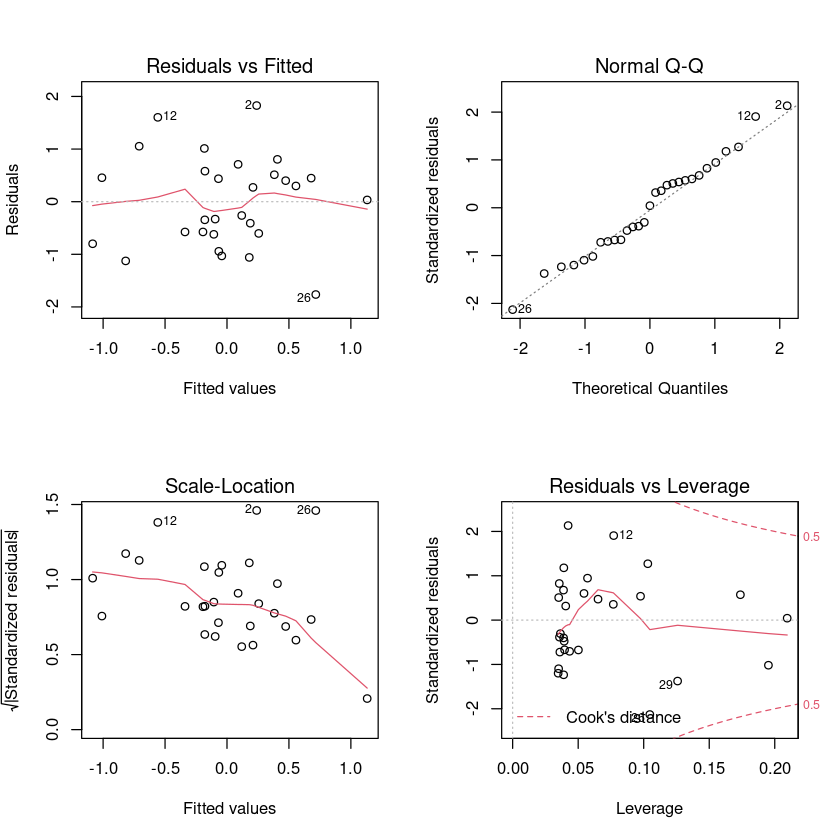

In [17]:
summary(selectMod1)

par(mfrow=c(2,2))
plot(selectMod1)

#Test normality
shapiro.test(selectMod1$resid)

# Test heterostescadisity 
bptest(selectMod1)


Call:
lm(formula = sit ~ slp + sat, data = reg2_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72822 -0.40283 -0.06264  0.15513  1.26554 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.098e-15  1.046e-01   0.000   1.0000    
slp         -2.115e-01  1.070e-01  -1.977   0.0587 .  
sat         -7.915e-01  1.070e-01  -7.399 7.41e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5631 on 26 degrees of freedom
Multiple R-squared:  0.7056,	Adjusted R-squared:  0.6829 
F-statistic: 31.15 on 2 and 26 DF,  p-value: 1.249e-07



	Shapiro-Wilk normality test

data:  selectMod2$resid
W = 0.92645, p-value = 0.04454



	studentized Breusch-Pagan test

data:  selectMod2
BP = 6.7304, df = 2, p-value = 0.03455


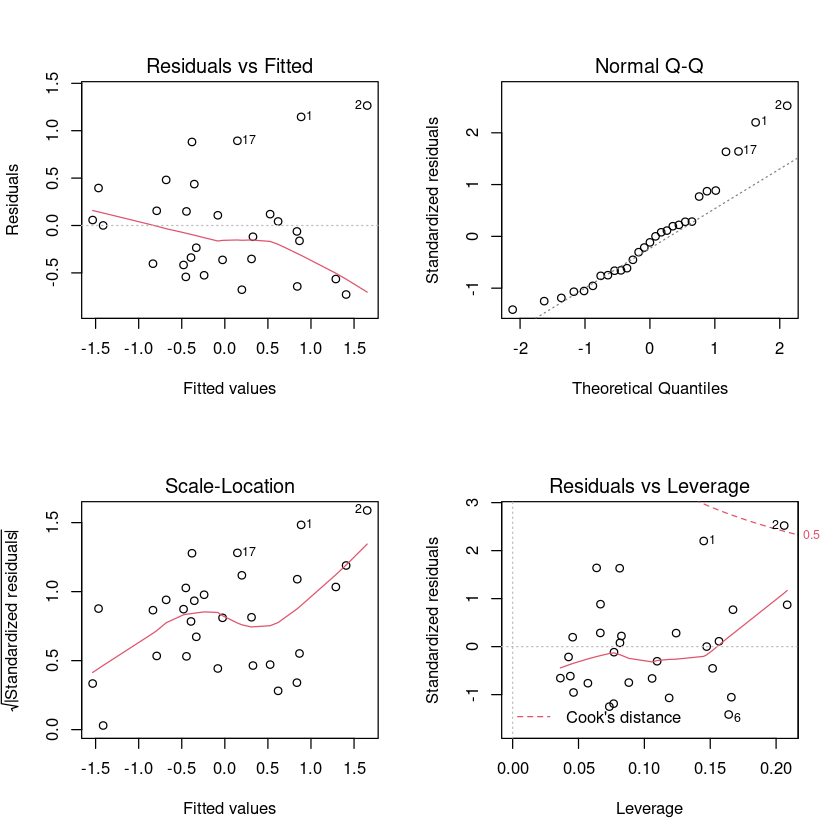

In [18]:
summary(selectMod2)

par(mfrow=c(2,2))
plot(selectMod2)

#Test normality
shapiro.test(selectMod2$resid)

# Test heterostescadisity 
bptest(selectMod2)


Call:
lm(formula = sit ~ sig + sat + u10 + v10, data = reg3_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6266 -0.3857  0.1136  0.4263  1.6586 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.336e-17  1.589e-01   0.000   1.0000  
sig         -3.479e-01  1.765e-01  -1.972   0.0603 .
sat         -3.789e-01  1.683e-01  -2.252   0.0338 *
u10          3.623e-01  1.706e-01   2.123   0.0443 *
v10         -3.065e-01  1.672e-01  -1.833   0.0793 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8558 on 24 degrees of freedom
Multiple R-squared:  0.3723,	Adjusted R-squared:  0.2677 
F-statistic: 3.559 on 4 and 24 DF,  p-value: 0.02046



	Shapiro-Wilk normality test

data:  selectMod3$resid
W = 0.96204, p-value = 0.3688



	studentized Breusch-Pagan test

data:  selectMod3
BP = 3.2664, df = 4, p-value = 0.5143


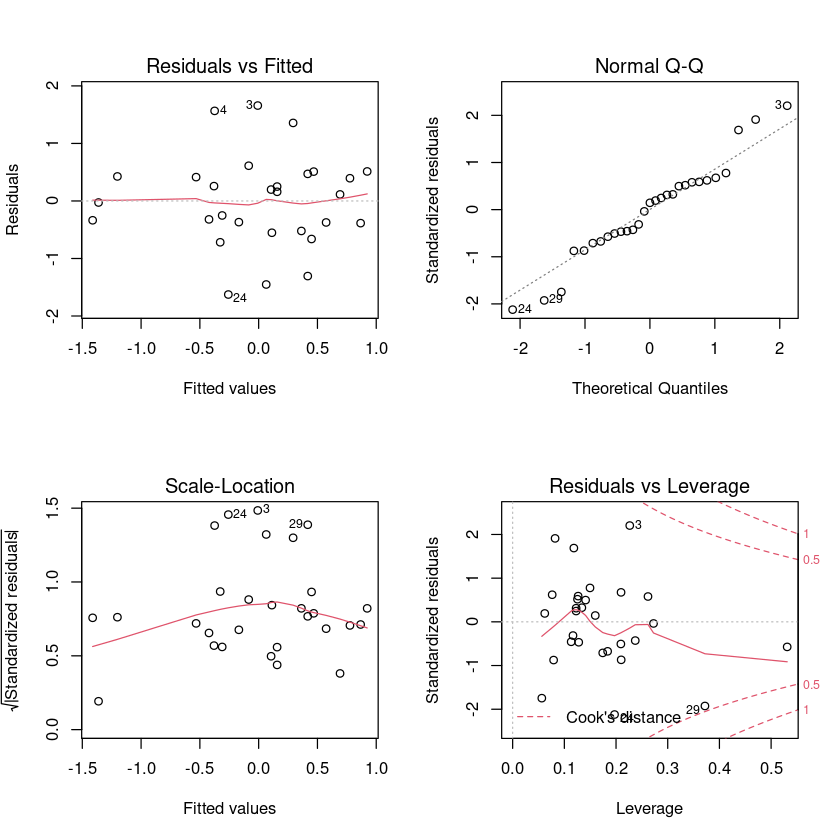

In [19]:
summary(selectMod3)

par(mfrow=c(2,2))
plot(selectMod3)

#Test normality
shapiro.test(selectMod3$resid)

# Test heterostescadisity 
bptest(selectMod3)


Call:
lm(formula = sit ~ sat + slp, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55676 -0.29056  0.03453  0.35262  1.41099 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.446e-15  1.258e-01   0.000 1.000000    
sat         -6.589e-01  1.336e-01  -4.932 4.02e-05 ***
slp         -6.064e-01  1.336e-01  -4.539 0.000113 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6775 on 26 degrees of freedom
Multiple R-squared:  0.5737,	Adjusted R-squared:  0.541 
F-statistic:  17.5 on 2 and 26 DF,  p-value: 1.534e-05



	Shapiro-Wilk normality test

data:  selectMod4$resid
W = 0.98831, p-value = 0.9819



	studentized Breusch-Pagan test

data:  selectMod4
BP = 4.6349, df = 2, p-value = 0.09852


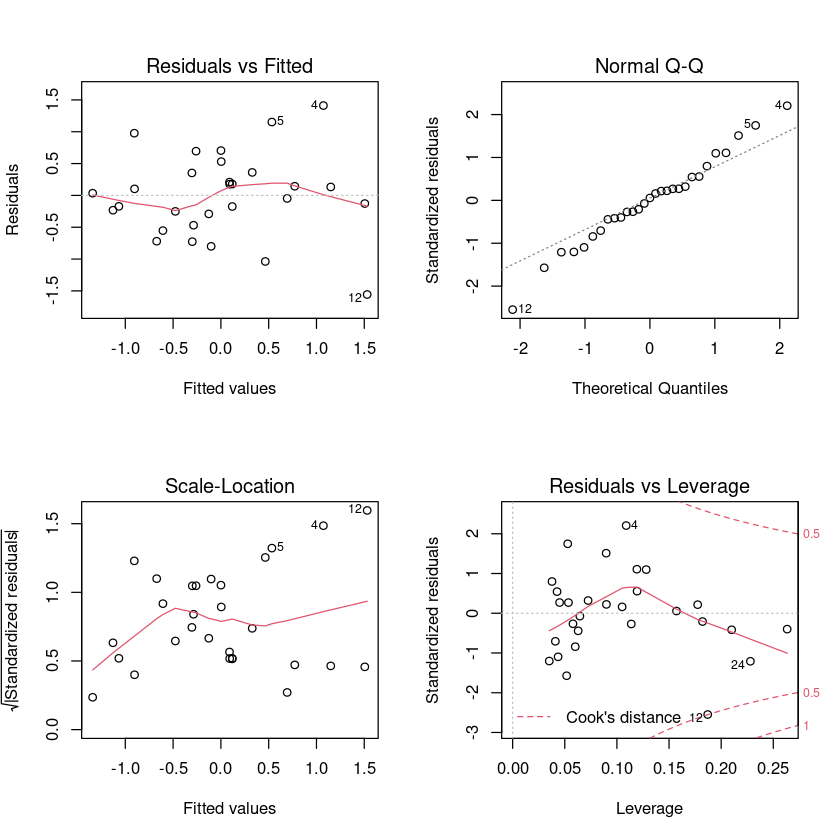

In [20]:
summary(selectMod4)

par(mfrow=c(2,2))
plot(selectMod4)

#Test normality
shapiro.test(selectMod4$resid)

# Test heterostescadisity 
bptest(selectMod4)


Call:
lm(formula = sit ~ sat, data = reg5_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4699 -0.5027 -0.2659  0.6045  2.1085 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.062e-15  1.536e-01   0.000 1.000000    
sat         -5.834e-01  1.563e-01  -3.733 0.000894 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8271 on 27 degrees of freedom
Multiple R-squared:  0.3404,	Adjusted R-squared:  0.3159 
F-statistic: 13.93 on 1 and 27 DF,  p-value: 0.0008938



	Shapiro-Wilk normality test

data:  selectMod5$resid
W = 0.97012, p-value = 0.563



	studentized Breusch-Pagan test

data:  selectMod5
BP = 2.6935, df = 1, p-value = 0.1008


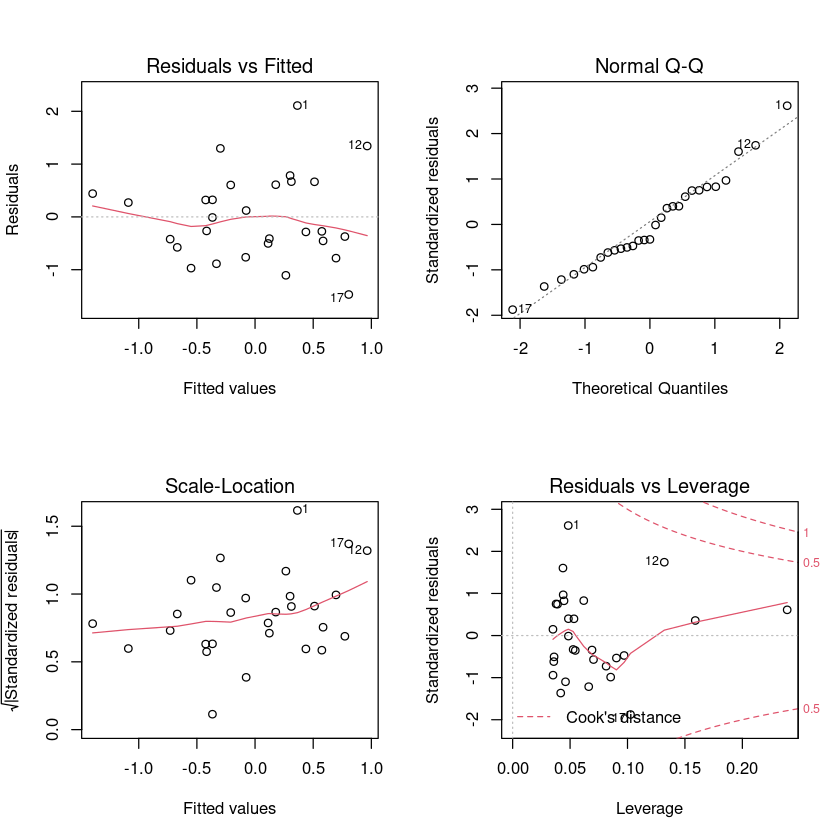

In [21]:
summary(selectMod5)

par(mfrow=c(2,2))
plot(selectMod5)

#Test normality
shapiro.test(selectMod5$resid)

# Test heterostescadisity 
bptest(selectMod5)

### Overall, the models do not perform well. They mostly explain very little of the variance, have large residual standard errors and at times violate the assumptions of constant variance and normality. We suspect that the models may have been overly simplified at the point of removing the multicollinearity due to the very conservative conditions imposed leading to the removal of important explanatory variables. At this point, we also have not introduced any interaction terms. We will return to the step where we treat multicollinearity and apply less strict conditions. We will only require for the VIF value to be within the cutoff value  of 2.5. Furthermore, instead of removing the variable with the largest VIF value, we will use physical intuition to interpret which variables are correlated and will bring the most new information while also removing the collinearity.  We keep in mind that these models will at times include more variables, so when comparing to the previously defined models, we will use the adjusted R-squared value. Once the multicollinearity is removed, we will include the interaction terms for the independent explanatory variables. We will return the results for two cases: for the model that minimizes the AIC, for the model that minimizes the AIC with non-significant variables removed.


Call:
omcdiag(mod = fit1_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1224         0
Farrar Chi-Square:        52.8605         1
Red Indicator:             0.2920         0
Sum of Lambda Inverse:    15.9927         0
Theil's Method:           -1.2320         0
Condition Number:          4.8287         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit1_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer    CVIF Klein   IND1   IND2
sia 3.4522 0.2897 11.2801 14.7131 0.5382 -0.8794     0 0.0630 1.3467
sig 1.6085 0.6217  2.7993  3.6513 0.7885 -0.4098     0 0.1351 0.7173
sat 5.1010 0.1960 18.8646 24.6060 0.4428 -1.2995     0 0.0426 1.5243
slp 1.2937 0.7730  1.3511  1.7623 0.8792 -0.3296     0 0.1680 0.4304
u10 1.6397 0.6099  2.9425  3.8380 0.7809 -0.4177     0 0.1326 0.7397
v10 2.8975 0.3451  8.7287 11.3852 0.5875 -0.7381     0 0.0750 1.2416

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.8793 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit1_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.3547         0
Farrar Chi-Square:        26.4322         1
Red Indicator:             0.2997         0
Sum of Lambda Inverse:     7.8385         0
Theil's Method:           -1.9386         0
Condition Number:          2.7678         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit1_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi      Fi Leamer    CVIF Klein   IND1   IND2
sia 2.2706 0.4404 7.6234 10.5880 0.6636 -1.3043     0 0.0734 1.7780
sig 1.3238 0.7554 1.9426  2.6980 0.8691 -0.7604     0 0.1259 0.7771
sat 1.8883 0.5296 5.3298  7.4025 0.7277 -1.0847     0 0.0883 1.4947
slp 1.1277 0.8867 0.7663  1.0643 0.9417 -0.6478     0 0.1478 0.3598
u10 1.2282 0.8142 1.3692  1.9017 0.9023 -0.7055     0 0.1357 0.5904

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sig , slp , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.8781 

* use method argument to check which regressors may be the reason of collinearity

Start:  AIC=-46.66
sit ~ sia + sig + sat + slp + u10 + sia * sig + sia:sat + sia:slp + 
    sia:u10 + sig:sat + sig:slp + sig:u10 + sat:slp + sat:u10 + 
    slp:u10

          Df Sum of Sq    RSS     AIC
- slp:u10  1  0.000063 1.9250 -48.658
- sia:slp  1  0.000127 1.9251 -48.657
- sig:slp  1  0.008349 1.9333 -48.534
- sig:sat  1  0.010842 1.9358 -48.496
- sig:u10  1  0.042838 1.9678 -48.021
- sia:sat  1  0.057040 1.9820 -47.812
- sat:u10  1  0.071960 1.9969 -47.595
- sia:sig  1  0.097637 2.0226 -47.224
<none>                 1.9250 -46.659
- sat:slp  1  0.244261 2.1692 -45.195
- sia:u10  1  0.274568 2.1995 -44.792

Step:  AIC=-48.66
sit ~ sia + sig + sat + slp + u10 + sia:sig + sia:sat + sia:slp + 
    sia:u10 + sig:sat + sig:slp + sig:u10 + sat:slp + sat:u10

          Df Sum of Sq    RSS     AIC
- sia:slp  1   0.00012 1.9252 -50.656
- sig:slp  1   0.00836 1.9334 -50.533
- sig:sat  1   0.01101 1.9361 -50.493
- sig:u10  1   0.04713 1.9722 -49.957
- sia:sat  1   0.06607 1.9911 -49.680
-


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + sia:sig + sia:u10 + 
    sat:slp, data = reg1_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8609 -0.1024  0.0312  0.1387  0.5130 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03228    0.06809   0.474 0.640541    
sia         -0.43578    0.10279  -4.240 0.000402 ***
sig         -0.18051    0.07633  -2.365 0.028262 *  
sat         -0.64776    0.09211  -7.032 8.04e-07 ***
slp         -0.11840    0.07516  -1.575 0.130850    
u10          0.47533    0.07185   6.616 1.92e-06 ***
sia:sig     -0.13589    0.06334  -2.145 0.044385 *  
sia:u10     -0.20157    0.08939  -2.255 0.035498 *  
sat:slp     -0.21015    0.08757  -2.400 0.026257 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3298 on 20 degrees of freedom
Multiple R-squared:  0.9223,	Adjusted R-squared:  0.8912 
F-statistic: 29.68 on 8 and 20 DF,  p-value: 1.839e-09



	Shapiro-Wilk normality test

data:  Mod1$resid
W = 0.94568, p-value = 0.1412



	studentized Breusch-Pagan test

data:  Mod1
BP = 7.8442, df = 8, p-value = 0.4488



Call:
lm(formula = sit ~ sia + sig + sat + u10 + sia * sig + sia:sat + 
    sia:slp + sia:u10 + sig:sat + sig:slp + sig:u10 + sat:slp + 
    sat:u10 + slp:u10, data = reg1_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01994 -0.10520 -0.01553  0.16274  0.39971 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.107704   0.128916   0.835 0.417489    
sia         -0.499195   0.138866  -3.595 0.002928 ** 
sig         -0.198725   0.120906  -1.644 0.122513    
sat         -0.637521   0.138435  -4.605 0.000408 ***
u10          0.489902   0.106403   4.604 0.000409 ***
sia:sig     -0.143724   0.154812  -0.928 0.368940    
sia:sat     -0.146894   0.193705  -0.758 0.460827    
sia:slp     -0.031584   0.176365  -0.179 0.860436    
sia:u10     -0.268657   0.212397  -1.265 0.226564    
sig:sat     -0.063481   0.137380  -0.462 0.651123    
sig:slp      0.027760   0.126229   0.220 0.829110    
sig:u10     -0.006828   0.148360  -0.046 0.963940    



Call:
lm(formula = sit ~ sia + sat + u10, data = reg1_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91966 -0.22470  0.04214  0.28062  0.55611 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.675e-16  7.446e-02   0.000  1.00000    
sia         -3.495e-01  9.556e-02  -3.657  0.00119 ** 
sat         -7.664e-01  1.005e-01  -7.629 5.52e-08 ***
u10          4.191e-01  8.351e-02   5.018 3.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.401 on 25 degrees of freedom
Multiple R-squared:  0.8564,	Adjusted R-squared:  0.8392 
F-statistic: 49.71 on 3 and 25 DF,  p-value: 1.111e-10


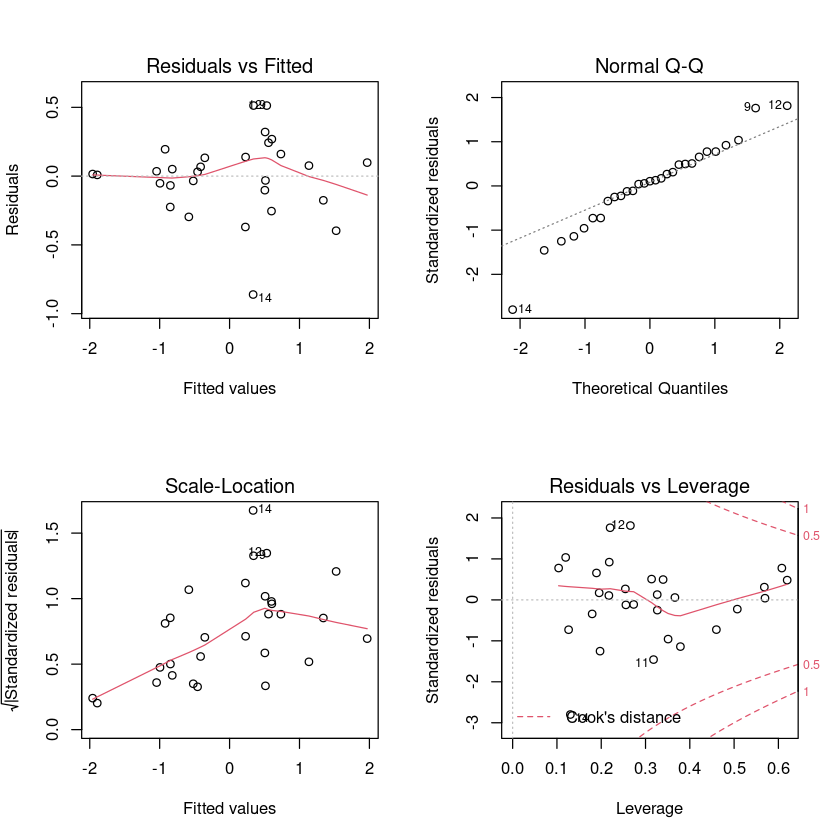


	Shapiro-Wilk normality test

data:  reduced_Mod1$resid
W = 0.96141, p-value = 0.3558



	studentized Breusch-Pagan test

data:  reduced_Mod1
BP = 2.189, df = 3, p-value = 0.5341


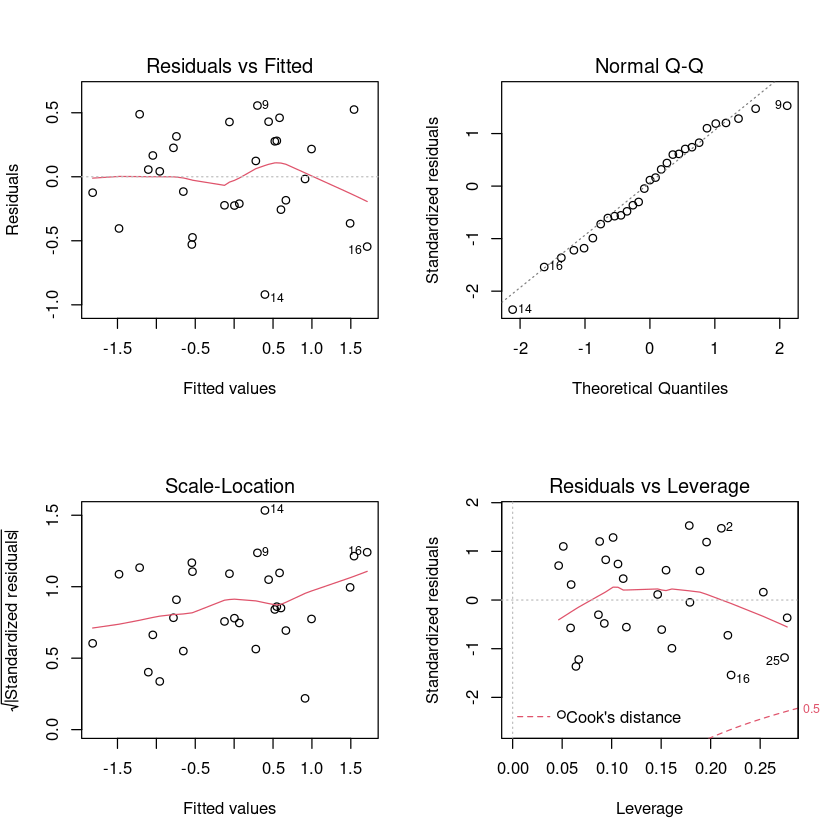

In [25]:
fit1_prelim <- lm(sit~.-yrs, data=reg1_norm)
omcdiag(fit1_prelim)
imcdiag(fit1_prelim)
fit1_prelim2 <- lm(sit~sia + sig + sat+ slp + u10  , data=reg1_norm)
omcdiag(fit1_prelim2)
imcdiag(fit1_prelim2)
fin_fit1 <- lm(sit ~ sia + sig + sat + slp +u10 + sia*sig +sia:sat + sia:slp +sia:u10 +sig:sat+sig:slp+sig:u10+sat:slp+sat:u10+slp:u10, data=reg1_norm)
Mod1 <- step(fin_fit1)
summary(Mod1)

par(mfrow=c(2,2))
plot(Mod1)
#Test normality
shapiro.test(Mod1$resid)

# Test heterostescadisity 
bptest(Mod1)

reduced_Mod1 <- lm(sit ~ sia + sig + sat +u10 + sia*sig +sia:sat + sia:slp +sia:u10 +sig:sat+sig:slp+sig:u10+sat:slp+sat:u10+slp:u10, data=reg1_norm)
summary(reduced_Mod1)
reduced_Mod1 <- lm(sit ~ sia + sat + u10, data = reg1_norm)
summary(reduced_Mod1)

par(mfrow=c(2,2))
plot(reduced_Mod1)
#Test normality
shapiro.test(reduced_Mod1$resid)

# Test heterostescadisity 
bptest(reduced_Mod1)

### For region 1, we notice that sia, sat and v10 have the largest VIF values. We expect these variables to be correlated since winds drive sea-ice advection and transport air with a specific temperature to the region. As such, we remove the meridional wind variable, v10, which reduces the VIF values of sia and sat to within the cut-off value. The resulting model has a greatly improved performance in comparison to the model developed with conservative multicollinearity conditions as is suggested by the R-squared value, the residual standard error and the diagnostic plots.


Call:
omcdiag(mod = fit2_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0823         0
Farrar Chi-Square:        62.8499         1
Red Indicator:             0.3530         0
Sum of Lambda Inverse:    15.0836         0
Theil's Method:           -0.6332         0
Condition Number:          4.3245         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit2_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 3.2532 0.3074 10.3648 13.5193 0.5544 4.6037     0 0.0668 1.2331
sig 3.0584 0.3270  9.4688 12.3506 0.5718 4.3280     0 0.0711 1.1983
sat 1.7275 0.5789  3.3464  4.3648 0.7608 2.4446     0 0.1258 0.7498
slp 1.4175 0.7055  1.9204  2.5049 0.8399 2.0059     0 0.1534 0.5244
u10 2.8777 0.3475  8.6372 11.2660 0.5895 4.0722     0 0.0755 1.1617
v10 2.7493 0.3637  8.0470 10.4960 0.6031 3.8906     0 0.0791 1.1328

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , u10 , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.8006 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit2_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.2368         0
Farrar Chi-Square:        36.7294         1
Red Indicator:             0.3799         0
Sum of Lambda Inverse:     8.7148         0
Theil's Method:           -1.1365         0
Condition Number:          3.0233         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit2_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.4519 0.6887 2.7115 3.7659 0.8299 1.9073     0 0.1148 0.7586
sig 1.9747 0.5064 5.8479 8.1221 0.7116 2.5940     0 0.0844 1.2031
sat 1.7240 0.5800 4.3441 6.0334 0.7616 2.2648     0 0.0967 1.0236
slp 1.4100 0.7092 2.4601 3.4168 0.8421 1.8523     0 0.1182 0.7088
v10 2.1542 0.4642 6.9250 9.6180 0.6813 2.8298     0 0.0774 1.3059

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.797 

* use method argument to check which regressors may be the reason of collinearity

Start:  AIC=-41.37
sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:sat + sia:slp + 
    sia:v10 + sig:sat + sig:slp + sig:v10 + sat:slp + sat:v10 + 
    slp:v10

          Df Sum of Sq    RSS     AIC
- sia:v10  1   0.03940 2.3495 -42.880
- sig:sat  1   0.04803 2.3581 -42.774
- sig:slp  1   0.12718 2.4372 -41.816
- sia:sat  1   0.14061 2.4507 -41.657
<none>                 2.3101 -41.371
- sig:v10  1   0.29591 2.6060 -39.875
- sat:slp  1   0.31677 2.6268 -39.644
- sat:v10  1   0.35516 2.6652 -39.223
- slp:v10  1   0.67724 2.9873 -35.915
- sia:slp  1   0.88377 3.1938 -33.976
- sia:sig  1   1.48495 3.7950 -28.975

Step:  AIC=-42.88
sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:sat + sia:slp + 
    sig:sat + sig:slp + sig:v10 + sat:slp + sat:v10 + slp:v10

          Df Sum of Sq    RSS     AIC
- sig:sat  1   0.02222 2.3717 -44.607
- sia:sat  1   0.12536 2.4748 -43.373
<none>                 2.3495 -42.880
- sig:slp  1   0.24350 2.5930 -42.020
- sig:v10  1   0.32120 2.6707 -41.164
- s


Call:
lm(formula = sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:slp + 
    sig:slp + sig:v10 + sat:slp + sat:v10 + slp:v10, data = reg2_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56969 -0.18788 -0.02434  0.21978  0.83903 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.139010   0.109823  -1.266  0.22372    
sia          0.091604   0.137165   0.668  0.51376    
sig         -0.003998   0.132864  -0.030  0.97637    
sat         -0.883801   0.123072  -7.181 2.19e-06 ***
slp          0.057087   0.129674   0.440  0.66566    
v10          0.068542   0.153037   0.448  0.66025    
sia:sig     -0.561674   0.143127  -3.924  0.00121 ** 
sia:slp      0.408204   0.153578   2.658  0.01719 *  
sig:slp     -0.222880   0.159795  -1.395  0.18214    
sig:v10     -0.295611   0.148441  -1.991  0.06379 .  
sat:slp     -0.284533   0.159722  -1.781  0.09383 .  
sat:v10      0.221523   0.129346   1.713  0.10609    
slp:v10      0.490786   0.19799


	Shapiro-Wilk normality test

data:  Mod2$resid
W = 0.97403, p-value = 0.6729



	studentized Breusch-Pagan test

data:  Mod2
BP = 13.507, df = 12, p-value = 0.3333



Call:
lm(formula = sit ~ sat + sia:sig + sia:slp + slp:v10, data = reg2_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65545 -0.36548  0.03117  0.19803  0.93364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.08554    0.10031  -0.853  0.40224    
sat         -0.81289    0.09809  -8.287 1.68e-08 ***
sia:sig     -0.37981    0.11251  -3.376  0.00250 ** 
sia:slp      0.40180    0.12313   3.263  0.00329 ** 
slp:v10      0.13528    0.11013   1.228  0.23120    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.485 on 24 degrees of freedom
Multiple R-squared:  0.7984,	Adjusted R-squared:  0.7648 
F-statistic: 23.76 on 4 and 24 DF,  p-value: 4.765e-08



Call:
lm(formula = sit ~ sat + sia:sig + sia:slp, data = reg2_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8421 -0.3830 -0.0081  0.2044  1.0482 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.06155    0.09939  -0.619  0.54134    
sat         -0.83670    0.09713  -8.614 5.95e-09 ***
sia:sig     -0.41041    0.11083  -3.703  0.00106 ** 
sia:slp      0.39351    0.12419   3.169  0.00401 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4899 on 25 degrees of freedom
Multiple R-squared:  0.7857,	Adjusted R-squared:   0.76 
F-statistic: 30.56 on 3 and 25 DF,  p-value: 1.594e-08


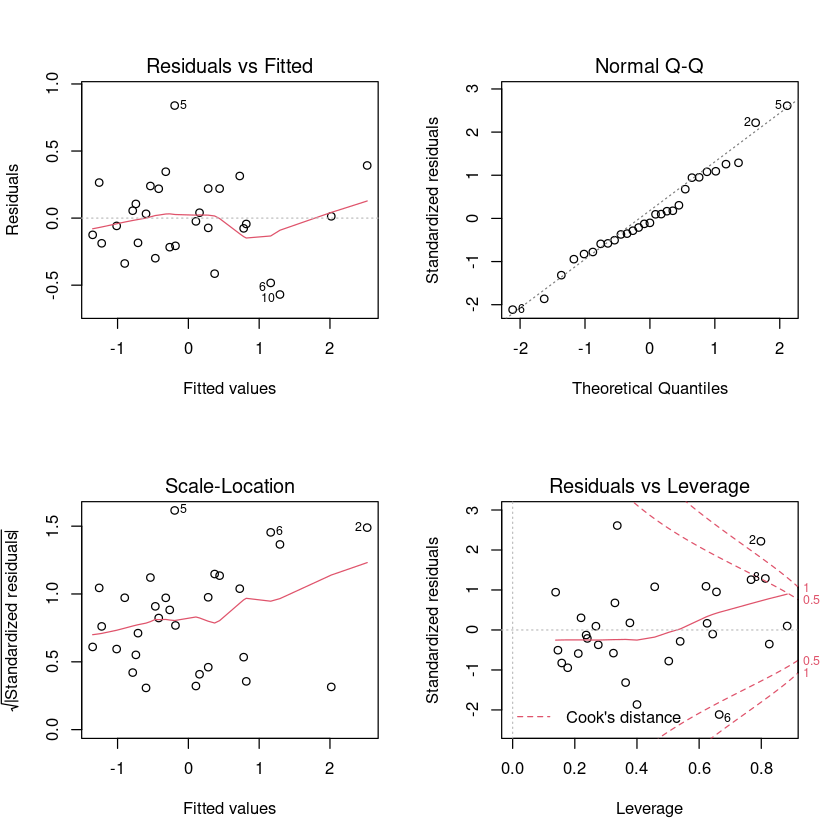


	Shapiro-Wilk normality test

data:  reduced_Mod2$resid
W = 0.97627, p-value = 0.7368



	studentized Breusch-Pagan test

data:  reduced_Mod2
BP = 5.0782, df = 3, p-value = 0.1662


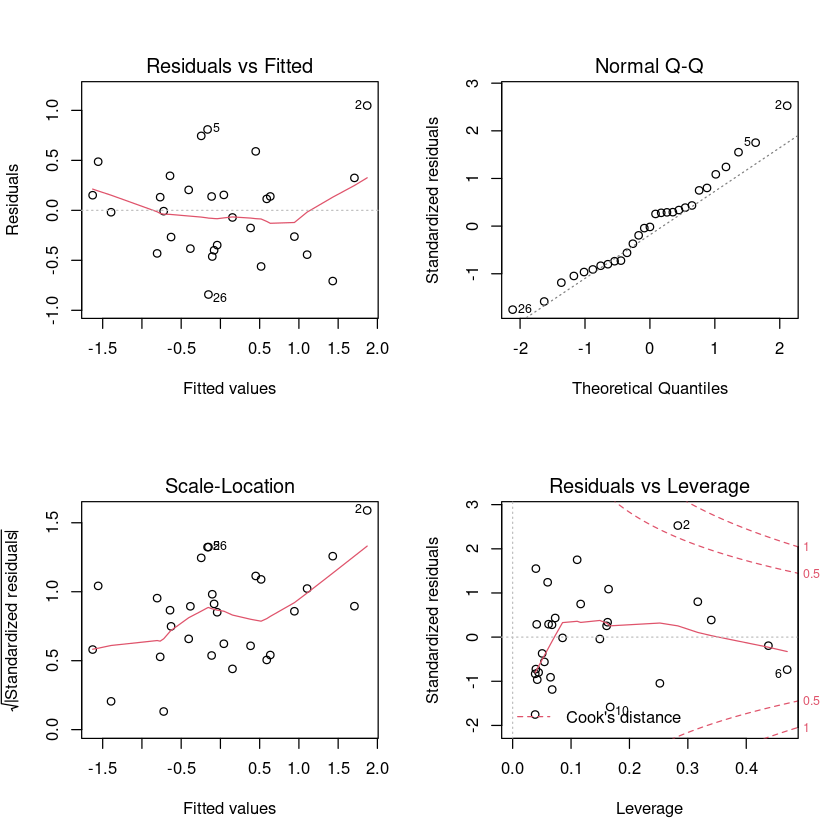

In [40]:
fit2_prelim <- lm(sit~.-yrs, data=reg2_norm)
omcdiag(fit2_prelim)
imcdiag(fit2_prelim)
fit2_prelim2 <- lm(sit~sia + sig + sat+ slp + v10  , data=reg2_norm)
omcdiag(fit2_prelim2)
imcdiag(fit2_prelim2)
fin_fit2 <- lm(sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:sat + sia:slp +sia:v10 + sig:sat + sig:slp + sig:v10 + sat:slp + sat:v10 + slp:v10, data=reg2_norm)
Mod2 <- step(fin_fit2)
summary(Mod2)

par(mfrow=c(2,2))
plot(Mod2)
#Test normality
shapiro.test(Mod2$resid)

# Test heterostescadisity 
bptest(Mod2)

reduced_Mod2 <- lm(sit ~ sat + sia:sig + sia:slp + slp:v10, data=reg2_norm)
summary(reduced_Mod2)
reduced_Mod2 <- lm(sit ~ sat + sia:sig + sia:slp, data=reg2_norm)
summary(reduced_Mod2)

par(mfrow=c(2,2))
plot(reduced_Mod2)
#Test normality
shapiro.test(reduced_Mod2$resid)

# Test heterostescadisity 
bptest(reduced_Mod2)

### Here, sia, u10 and v10 have the largest vif values. We remove the zonal wind component u10 which in this case is expected to be more correlated to sea-ice advection. The removal of this value reduces the vif values of the rest of the variables to within the threshold. Once again, the performance of the model has greatly improved as is seen by the improved R-squared and residual standard error. However, the Breusch-Pagan test is significant indicating that we reject the null hypothesis that the variance is constant. The linear model is not appropriate for this data.


Call:
omcdiag(mod = fit3_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1505         0
Farrar Chi-Square:        47.6603         1
Red Indicator:             0.3351         0
Sum of Lambda Inverse:    11.8214         0
Theil's Method:            0.2232         0
Condition Number:          3.7221         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit3_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 2.2816 0.4383 5.8954  7.6896 0.6620 2.9072     1 0.0953 1.2344
sig 1.4589 0.6855 2.1109  2.7533 0.8279 1.8589     0 0.1490 0.6912
sat 1.5336 0.6521 2.4546  3.2016 0.8075 1.9541     0 0.1418 0.7646
slp 2.7321 0.3660 7.9675 10.3925 0.6050 3.4812     1 0.0796 1.3932
u10 2.4137 0.4143 6.5032  8.4824 0.6437 3.0755     1 0.0901 1.2871
v10 1.4015 0.7135 1.8469  2.4090 0.8447 1.7858     0 0.1551 0.6295

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , sat , slp , u10 , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.5014 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit3_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.3633         0
Farrar Chi-Square:        25.8216         1
Red Indicator:             0.3099         0
Sum of Lambda Inverse:     7.6196         0
Theil's Method:           -0.3717         0
Condition Number:          2.7117         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit3_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 2.0366 0.4910 6.2198 8.6386 0.7007 1.9756     1 0.0818 1.5587
sig 1.4337 0.6975 2.6022 3.6142 0.8352 1.3907     0 0.1162 0.9264
sat 1.4895 0.6714 2.9370 4.0792 0.8194 1.4448     0 0.1119 1.0064
slp 1.2658 0.7900 1.5949 2.2151 0.8888 1.2279     0 0.1317 0.6431
v10 1.3940 0.7174 2.3639 3.2832 0.8470 1.3522     0 0.1196 0.8655

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.5011 

* use method argument to check which regressors may be the reason of collinearity

Start:  AIC=-10.1
sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:sat + sia:slp + 
    sia:v10 + sig:sat + sig:slp + sig:v10 + sat:slp + sat:v10 + 
    slp:v10

          Df Sum of Sq    RSS      AIC
- sia:sat  1   0.00164 6.7933 -12.0893
- sia:sig  1   0.00563 6.7973 -12.0723
- sig:sat  1   0.06526 6.8569 -11.8190
- sat:slp  1   0.07908 6.8708 -11.7606
- sia:slp  1   0.26902 7.0607 -10.9698
- slp:v10  1   0.34931 7.1410 -10.6419
- sig:v10  1   0.40857 7.2003 -10.4022
<none>                 6.7917 -10.0963
- sig:slp  1   0.49087 7.2826 -10.0726
- sat:v10  1   1.61902 8.4107  -5.8959
- sia:v10  1   1.89286 8.6845  -4.9668

Step:  AIC=-12.09
sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:slp + sia:v10 + 
    sig:sat + sig:slp + sig:v10 + sat:slp + sat:v10 + slp:v10

          Df Sum of Sq    RSS      AIC
- sia:sig  1   0.00414 6.7975 -14.0717
- sig:sat  1   0.07265 6.8660 -13.7808
- sat:slp  1   0.09365 6.8870 -13.6923
- sia:slp  1   0.26788 7.0612 -12.9677
- slp:v10  1   0.35911 7.


Call:
lm(formula = sit ~ sia + sig + sat + slp + v10 + sia:slp + sia:v10 + 
    sig:slp + sig:v10 + sat:v10, data = reg3_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3522 -0.3151  0.1066  0.3817  0.8610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.06386    0.15094   0.423  0.67726   
sia         -0.06361    0.18175  -0.350  0.73041   
sig         -0.68728    0.21030  -3.268  0.00427 **
sat         -0.33285    0.17902  -1.859  0.07941 . 
slp         -0.54384    0.14382  -3.781  0.00137 **
v10         -0.32611    0.16881  -1.932  0.06928 . 
sia:slp      0.47316    0.17127   2.763  0.01282 * 
sia:v10     -0.51877    0.22306  -2.326  0.03192 * 
sig:slp      0.27844    0.17383   1.602  0.12661   
sig:v10     -0.37296    0.21333  -1.748  0.09745 . 
sat:v10      0.47374    0.18394   2.575  0.01906 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6314 on 18 degrees of freedom
Multiple R-squ


	Shapiro-Wilk normality test

data:  Mod3$resid
W = 0.96518, p-value = 0.4376



	studentized Breusch-Pagan test

data:  Mod3
BP = 3.8931, df = 10, p-value = 0.952



Call:
lm(formula = sit ~ sig + slp + sia:slp + sia:v10 + sat:v10, data = reg3_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6039 -0.4994  0.1154  0.5798  1.0828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.22006    0.18571   1.185   0.2481  
sig         -0.03024    0.18108  -0.167   0.8688  
slp         -0.42085    0.17529  -2.401   0.0248 *
slp:sia      0.11133    0.14900   0.747   0.4625  
sia:v10     -0.50081    0.24812  -2.018   0.0554 .
v10:sat      0.24001    0.22539   1.065   0.2980  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8335 on 23 degrees of freedom
Multiple R-squared:  0.4294,	Adjusted R-squared:  0.3053 
F-statistic: 3.462 on 5 and 23 DF,  p-value: 0.01773



Call:
lm(formula = sit ~ slp, data = reg3_norm)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4627 -0.5285  0.1568  0.6575  1.1975 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7.316e-15  1.625e-01   0.000  1.00000   
slp         -5.117e-01  1.653e-01  -3.095  0.00455 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8749 on 27 degrees of freedom
Multiple R-squared:  0.2618,	Adjusted R-squared:  0.2345 
F-statistic: 9.577 on 1 and 27 DF,  p-value: 0.004549


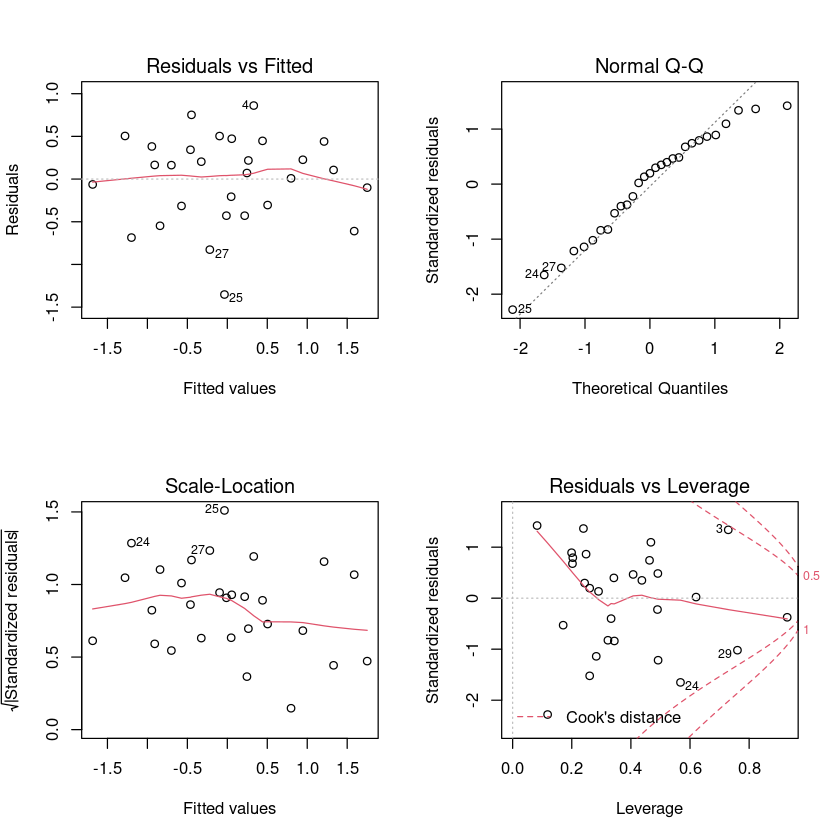


	Shapiro-Wilk normality test

data:  reduced_Mod3$resid
W = 0.94048, p-value = 0.1032



	studentized Breusch-Pagan test

data:  reduced_Mod3
BP = 1.5432, df = 1, p-value = 0.2141


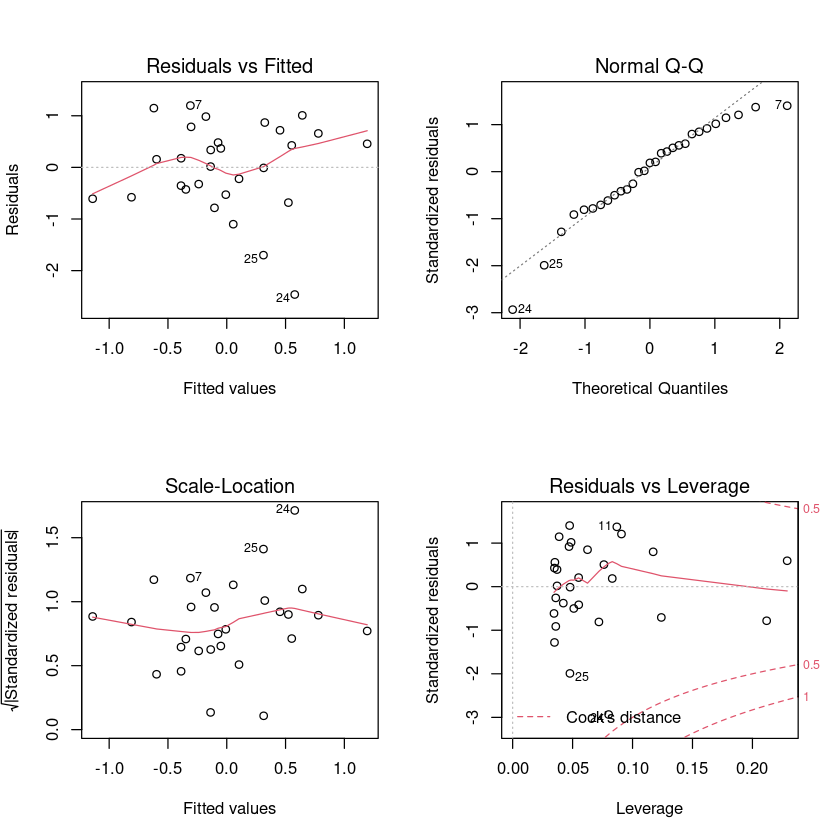

In [32]:
fit3_prelim <- lm(sit~.-yrs, data=reg3_norm)
omcdiag(fit3_prelim)
imcdiag(fit3_prelim)
fit3_prelim2 <- lm(sit~sia + sig + sat+ slp + v10  , data=reg3_norm)
omcdiag(fit3_prelim2)
imcdiag(fit3_prelim2)
fin_fit3 <- lm(sit ~ sia + sig + sat + slp + v10 + sia:sig + sia:sat + sia:slp + sia:v10 + sig:sat + sig: slp + sig:v10 + sat:slp + sat:v10 + slp:v10, data = reg3_norm)
Mod3 <- step(fin_fit3)
summary(Mod3)

par(mfrow=c(2,2))
plot(Mod3)
#Test normality
shapiro.test(Mod3$resid)

# Test heterostescadisity 
bptest(Mod3)

reduced_Mod3 <- lm(sit~ sig + slp + sia:slp + sia:v10 + sat:v10, data=reg3_norm)
summary(reduced_Mod3)
reduced_Mod3 <- lm(sit~ slp, data =reg3_norm)
summary(reduced_Mod3)

par(mfrow=c(2,2))
plot(reduced_Mod3)
#Test normality
shapiro.test(reduced_Mod3$resid)

# Test heterostescadisity 
bptest(reduced_Mod3)

### We once again opt to remove the wind variable u10 instead of the slp. This removal indeed removes the issue of collinearity. Although both the R-squared and the residual standard error are improved from the previous model, the new model still performs poorly. However, all assumptions are met. 


Call:
omcdiag(mod = fit4_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.1167         0
Farrar Chi-Square:        54.0712         1
Red Indicator:             0.3733         0
Sum of Lambda Inverse:    12.0428         0
Theil's Method:           -0.1195         0
Condition Number:          3.5198         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit4_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 2.2042 0.4537 5.5394 7.2253 0.6736 2.4596     0 0.0986 1.1197
sig 1.4926 0.6700 2.2661 2.9558 0.8185 1.6656     0 0.1456 0.6764
sat 1.7091 0.5851 3.2620 4.2547 0.7649 1.9071     0 0.1272 0.8504
slp 1.9970 0.5008 4.5862 5.9820 0.7076 2.2284     0 0.1089 1.0232
u10 2.3971 0.4172 6.4268 8.3827 0.6459 2.6749     0 0.0907 1.1945
v10 2.2427 0.4459 5.7166 7.4564 0.6677 2.5026     0 0.0969 1.1357

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , sig , u10 , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.6094 

* use method argument to check which regressors may be the reason of collinearity

Start:  AIC=-20.15
sit ~ sia + sig + sat + slp + u10 + v10 + sia:sig + sia:sat + 
    sia:slp + sia:u10 + sia:v10 + sig:sat + sig:slp + sig:u10 + 
    sig:v10 + sat:slp + sat:u10 + sat:v10 + slp:u10 + slp:v10 + 
    u10:v10

          Df Sum of Sq    RSS      AIC
- sia:sig  1   0.00211 3.1772 -22.1279
- sig:u10  1   0.00593 3.1810 -22.0930
- sia:sat  1   0.00601 3.1811 -22.0923
- slp:u10  1   0.02508 3.2001 -21.9190
- u10:v10  1   0.03634 3.2114 -21.8171
- sig:v10  1   0.06721 3.2423 -21.5397
- sat:v10  1   0.08775 3.2628 -21.3566
- sig:slp  1   0.15366 3.3287 -20.7766
<none>                 3.1751 -20.1472
- sat:u10  1   0.26592 3.4410 -19.8147
- slp:v10  1   0.98105 4.1561 -14.3388
- sia:u10  1   1.07621 4.2513 -13.6823
- sat:slp  1   1.11938 4.2944 -13.3893
- sia:slp  1   1.32070 4.4958 -12.0607
- sia:v10  1   1.76848 4.9435  -9.3073
- sig:sat  1   2.05212 5.2272  -7.6894

Step:  AIC=-22.13
sit ~ sia + sig + sat + slp + u10 + v10 + sia:sat + sia:slp + 
    sia:u10 + sia:v10 + sig:sa


Call:
lm(formula = sit ~ sia + sig + sat + slp + u10 + v10 + sia:slp + 
    sia:u10 + sia:v10 + sig:sat + sig:slp + sig:v10 + sat:slp + 
    sat:u10 + slp:v10, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69331 -0.18862 -0.00218  0.24128  0.63332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03800    0.13694   0.277 0.785767    
sia         -0.48613    0.19567  -2.484 0.027377 *  
sig         -0.15532    0.14505  -1.071 0.303751    
sat         -1.19848    0.18175  -6.594 1.73e-05 ***
slp         -0.46169    0.19494  -2.368 0.034039 *  
u10          0.60812    0.23062   2.637 0.020514 *  
v10          0.03756    0.15613   0.241 0.813664    
sia:slp     -1.00154    0.35089  -2.854 0.013545 *  
sia:u10     -1.23596    0.34417  -3.591 0.003287 ** 
sia:v10      0.89824    0.31031   2.895 0.012535 *  
sig:sat     -1.06573    0.24286  -4.388 0.000733 ***
sig:slp     -0.30040    0.15188  -1.978 0.069526 .  
sig:v10      


	Shapiro-Wilk normality test

data:  Mod4$resid
W = 0.96974, p-value = 0.5528



	studentized Breusch-Pagan test

data:  Mod4
BP = 12.51, df = 15, p-value = 0.6401



Call:
lm(formula = sit ~ sia + sat + slp + u10 + sia:slp + sia:u10 + 
    sia:v10 + sig:sat + sat:slp + sat:u10 + slp:v10, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96418 -0.19305 -0.03108  0.35005  0.92807 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02391    0.17057  -0.140   0.8902    
sia         -0.42461    0.23217  -1.829   0.0850 .  
sat         -1.05710    0.20859  -5.068 9.51e-05 ***
slp         -0.57399    0.23217  -2.472   0.0243 *  
u10          0.50904    0.28733   1.772   0.0944 .  
sia:slp     -0.51373    0.40200  -1.278   0.2184    
sia:u10     -1.11588    0.42639  -2.617   0.0180 *  
sia:v10      0.83090    0.35456   2.343   0.0315 *  
sat:sig     -0.63577    0.26178  -2.429   0.0265 *  
sat:slp      0.36206    0.25906   1.398   0.1802    
sat:u10      0.39102    0.24629   1.588   0.1308    
slp:v10     -0.16316    0.18526  -0.881   0.3907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.


Call:
lm(formula = sit ~ sat + slp + sia:u10 + sia:v10 + sig:sat, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33770 -0.33228  0.03826  0.40063  1.27997 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05511    0.16382   0.336 0.739621    
sat         -0.68105    0.15943  -4.272 0.000286 ***
slp         -0.64824    0.15100  -4.293 0.000271 ***
sia:u10     -0.04695    0.22071  -0.213 0.833402    
sia:v10      0.08162    0.25345   0.322 0.750318    
sat:sig     -0.11756    0.17251  -0.682 0.502353    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7092 on 23 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.497 
F-statistic: 6.533 on 5 and 23 DF,  p-value: 0.0006439



Call:
lm(formula = sit ~ sat + slp, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55676 -0.29056  0.03453  0.35262  1.41099 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.446e-15  1.258e-01   0.000 1.000000    
sat         -6.589e-01  1.336e-01  -4.932 4.02e-05 ***
slp         -6.064e-01  1.336e-01  -4.539 0.000113 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6775 on 26 degrees of freedom
Multiple R-squared:  0.5737,	Adjusted R-squared:  0.541 
F-statistic:  17.5 on 2 and 26 DF,  p-value: 1.534e-05


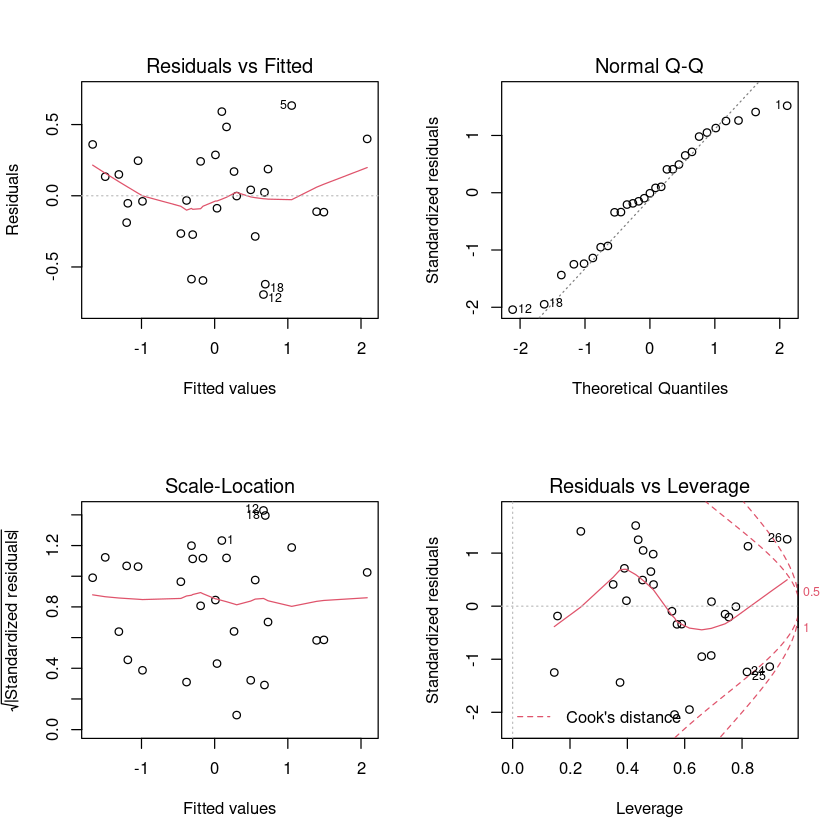


	Shapiro-Wilk normality test

data:  reduced_Mod4$resid
W = 0.98831, p-value = 0.9819



	studentized Breusch-Pagan test

data:  reduced_Mod4
BP = 4.6349, df = 2, p-value = 0.09852


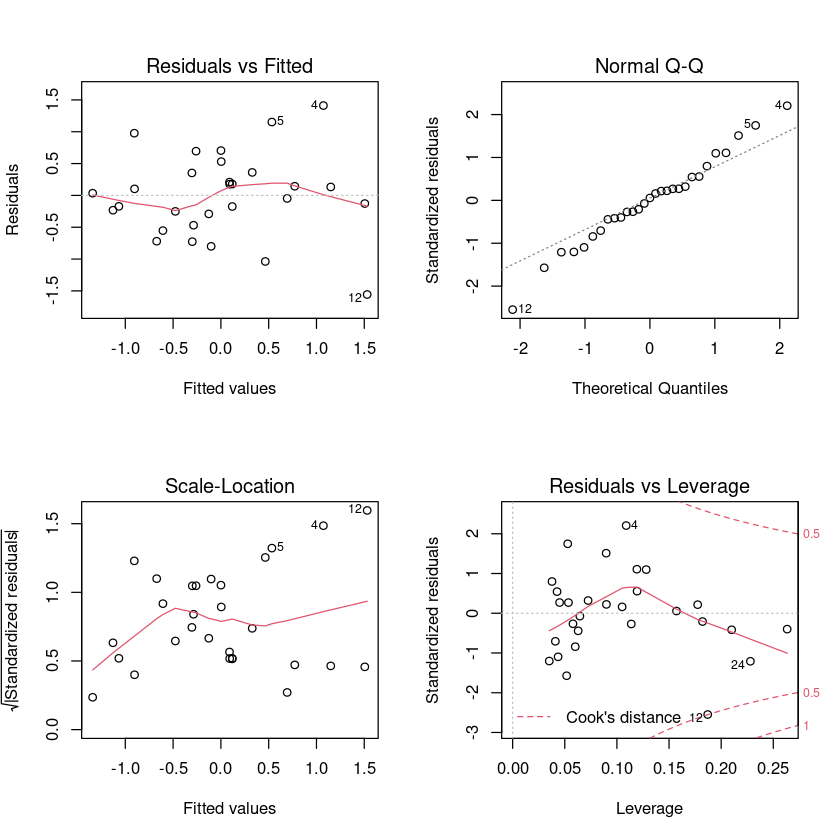

In [37]:
fit4_prelim <- lm(sit~.-yrs, data=reg4_norm)
omcdiag(fit4_prelim)
imcdiag(fit4_prelim)
fin_fit4 <- lm(sit~ sia + sig +sat +slp +u10 + v10 + sia:sig + sia:sat + sia:slp +sia:u10 + sia:v10 + sig:sat + sig:slp + sig:u10 + sig:v10 + sat:slp + sat:u10 + sat:v10 + slp:u10 +slp:v10 + u10:v10, data=reg4_norm) 
Mod4 <- step(fin_fit4)
summary(Mod4)

par(mfrow=c(2,2))
plot(Mod4)
#Test normality
shapiro.test(Mod4$resid)

# Test heterostescadisity 
bptest(Mod4)

reduced_Mod4 <- lm(sit~ sia + sat + slp + u10 + sia:slp + sia:u10 + sia:v10 + sig:sat + sat:slp + sat:u10 +slp:v10, data = reg4_norm)
summary(reduced_Mod4)
reduced_Mod4 <- lm(sit~ sat + slp + sia:u10 + sia:v10 + sig:sat, data = reg4_norm)
summary(reduced_Mod4)
reduced_Mod4 <- lm(sit~ sat + slp, data = reg4_norm)
summary(reduced_Mod4)

par(mfrow=c(2,2))
plot(reduced_Mod4)
#Test normality
shapiro.test(reduced_Mod4$resid)

# Test heterostescadisity 
bptest(reduced_Mod4)

### For this region, none of the variables have a vif that exceed the cut-off value, so we continue the analysis using the full model. Although the R-squared and the residual standard error are improved, our new model does not have constant variance as is highlighted by the significant Breusch-Pagan test. This means the model is not appropriate for the data


Call:
omcdiag(mod = fit5_prelim)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.0564         0
Farrar Chi-Square:        72.3610         1
Red Indicator:             0.3999         0
Sum of Lambda Inverse:    16.1485         0
Theil's Method:            0.0286         0
Condition Number:          4.4202         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 2.6495 0.3774  7.5878  9.8972 0.6143 2.4816     0 0.0820 1.0450
sig 2.9261 0.3418  8.8601 11.5567 0.5846 2.7406     0 0.0743 1.1048
sat 1.7201 0.5814  3.3125  4.3206 0.7625 1.6111     0 0.1264 0.7027
slp 3.1093 0.3216  9.7030 12.6561 0.5671 2.9123     0 0.0699 1.1386
u10 3.9182 0.2552 13.4239 17.5095 0.5052 3.6699     1 0.0555 1.2501
v10 1.8252 0.5479  3.7957  4.9509 0.7402 1.7095     0 0.1191 0.7588

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.7092 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit5_prelim2)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.2210         0
Farrar Chi-Square:        38.4954         1
Red Indicator:             0.3294         0
Sum of Lambda Inverse:    10.1248         0
Theil's Method:           -0.1904         0
Condition Number:          3.4620         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim2)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL      Wi      Fi Leamer   CVIF Klein   IND1   IND2
sia 2.0930 0.4778  6.5578  9.1081 0.6912 2.4070     0 0.0796 1.1033
sig 2.6683 0.3748 10.0098 13.9024 0.6122 3.0686     0 0.0625 1.3210
sat 1.2696 0.7876  1.6178  2.2470 0.8875 1.4601     0 0.1313 0.4487
slp 2.3086 0.4332  7.8519 10.9054 0.6581 2.6550     0 0.0722 1.1976
v10 1.7853 0.5601  4.7117  6.5440 0.7484 2.0531     0 0.0934 0.9293

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.6392 

* use method argument to check which regressors may be the reason of collinearity


Call:
omcdiag(mod = fit5_prelim3)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.5897         0
Farrar Chi-Square:        13.6448         1
Red Indicator:             0.2798         0
Sum of Lambda Inverse:     5.2945         0
Theil's Method:           -0.4733         0
Condition Number:          2.1214         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test



Call:
imcdiag(mod = fit5_prelim3)


All Individual Multicollinearity Diagnostics Result

       VIF    TOL     Wi     Fi Leamer   CVIF Klein   IND1   IND2
sia 1.0371 0.9642 0.3096 0.4829 0.9819 1.0544     0 0.1157 0.1733
sat 1.0319 0.9691 0.2660 0.4150 0.9844 1.0491     0 0.1163 0.1497
slp 1.6121 0.6203 5.1008 7.9573 0.7876 1.6389     0 0.0744 1.8373
v10 1.6134 0.6198 5.1113 7.9737 0.7873 1.6401     0 0.0744 1.8397

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

sia , slp , v10 , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.4333 

* use method argument to check which regressors may be the reason of collinearity

Start:  AIC=2.19
sit ~ sia + sat + slp + v10 + sia:sat + sia:slp + sia:v10 + sat:slp + 
    sat:v10 + slp:v10

          Df Sum of Sq    RSS     AIC
- sia:slp  1   0.00039 14.647 0.19047
- sia:sat  1   0.07853 14.725 0.34477
- sat:slp  1   0.25678 14.903 0.69372
- slp:v10  1   0.26979 14.916 0.71902
- sia:v10  1   0.58578 15.232 1.32697
- sat:v10  1   0.83109 15.477 1.79029
<none>                 14.646 2.18970

Step:  AIC=0.19
sit ~ sia + sat + slp + v10 + sia:sat + sia:v10 + sat:slp + sat:v10 + 
    slp:v10

          Df Sum of Sq    RSS      AIC
- sia:sat  1   0.08372 14.730 -1.64424
- slp:v10  1   0.27596 14.923 -1.26823
- sat:slp  1   0.30030 14.947 -1.22096
- sia:v10  1   0.83118 15.478 -0.20881
- sat:v10  1   0.84386 15.491 -0.18507
<none>                 14.647  0.19047

Step:  AIC=-1.64
sit ~ sia + sat + slp + v10 + sia:v10 + sat:slp + sat:v10 + slp:v10

          Df Sum of Sq    RSS     AIC
- slp:v10  1   0.20727 14.938 -3.2390
- sat:slp  1   0.31720 15.047 -3.0264
- sat:v10 


Call:
lm(formula = sit ~ sat + v10, data = reg5_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52468 -0.52576 -0.08074  0.41901  2.17774 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.030e-15  1.500e-01   0.000  1.00000   
sat         -5.550e-01  1.538e-01  -3.609  0.00129 **
v10         -2.335e-01  1.538e-01  -1.518  0.14102   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8078 on 26 degrees of freedom
Multiple R-squared:  0.3941,	Adjusted R-squared:  0.3475 
F-statistic: 8.456 on 2 and 26 DF,  p-value: 0.001483



	Shapiro-Wilk normality test

data:  Mod5$resid
W = 0.95834, p-value = 0.299



	studentized Breusch-Pagan test

data:  Mod5
BP = 1.8866, df = 2, p-value = 0.3893



Call:
lm(formula = sit ~ sat, data = reg4_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65983 -0.69119 -0.04793  0.57053  1.93811 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.381e-16  1.653e-01   0.000  1.00000   
sat         -4.857e-01  1.682e-01  -2.888  0.00756 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8901 on 27 degrees of freedom
Multiple R-squared:  0.236,	Adjusted R-squared:  0.2077 
F-statistic: 8.338 on 1 and 27 DF,  p-value: 0.007555


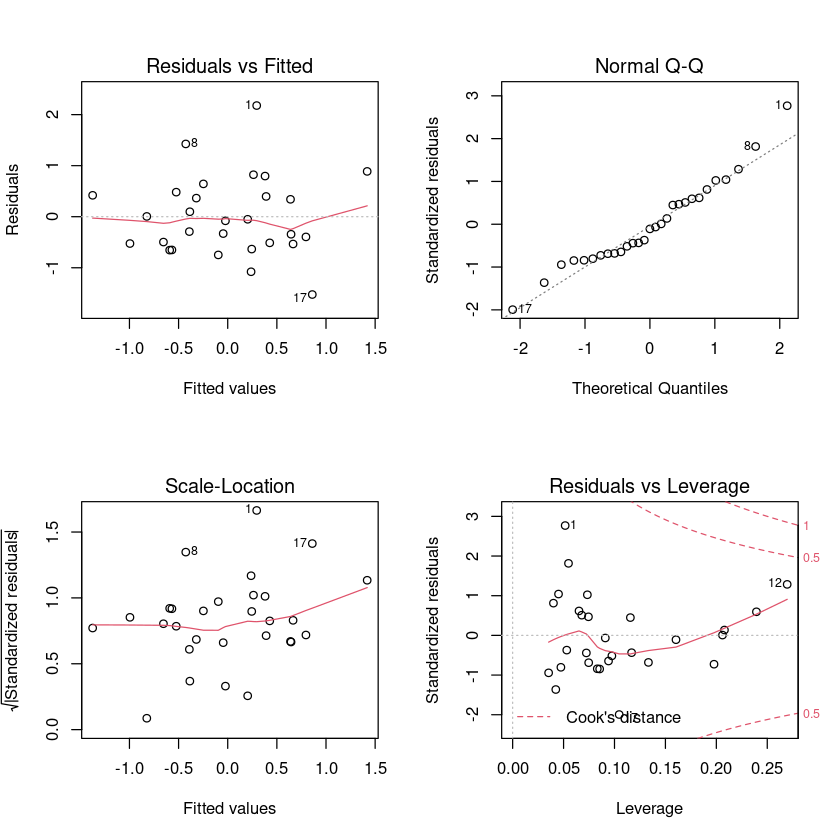


	Shapiro-Wilk normality test

data:  reduced_Mod5$resid
W = 0.97275, p-value = 0.6363



	studentized Breusch-Pagan test

data:  reduced_Mod5
BP = 1.8801, df = 1, p-value = 0.1703


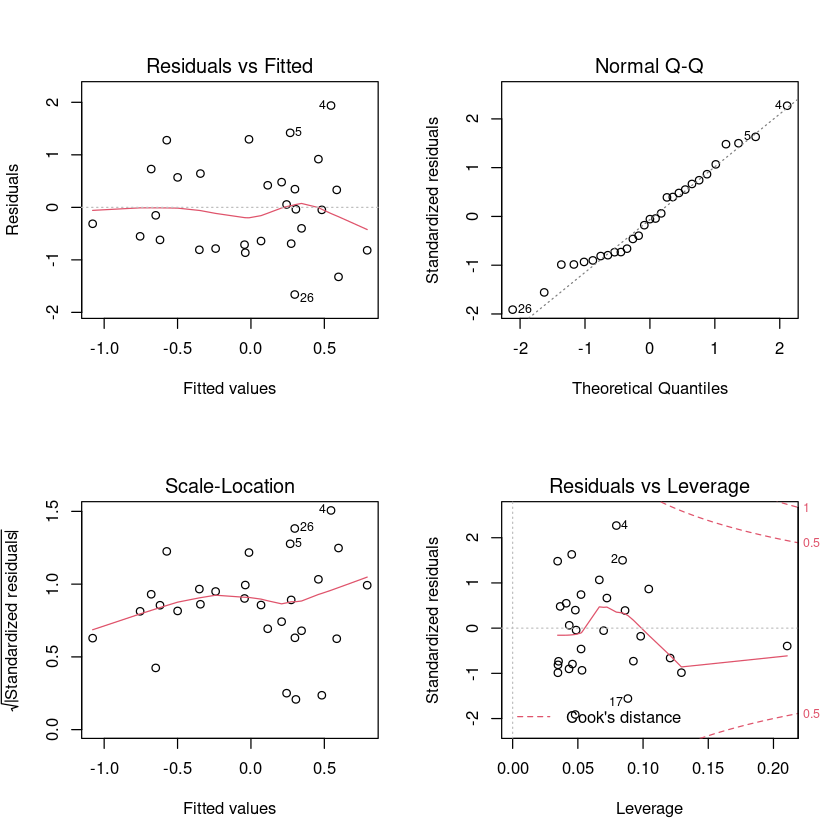

In [39]:
fit5_prelim <- lm(sit~.-yrs, data=reg5_norm)
omcdiag(fit5_prelim)
imcdiag(fit5_prelim)
fit5_prelim2 <- lm(sit~sia + sig + sat+ slp + v10  , data=reg5_norm)
omcdiag(fit5_prelim2)
imcdiag(fit5_prelim2)
fit5_prelim3 <- lm(sit~sia + sat+ slp + v10  , data=reg5_norm)
omcdiag(fit5_prelim3)
imcdiag(fit5_prelim3)
fin_fit5 <- lm(sit ~ sia + sat + slp + v10 + sia:sat + sia:slp + sia:v10 + sat:slp + sat:v10 + slp:v10, data=reg5_norm)
Mod5 <- step(fin_fit5)
summary(Mod5)

par(mfrow=c(2,2))
plot(Mod5)
#Test normality
shapiro.test(Mod5$resid)

# Test heterostescadisity 
bptest(Mod5)

reduced_Mod5 <- lm(sit~sat, data=reg4_norm)
summary(reduced_Mod5)

par(mfrow=c(2,2))
plot(reduced_Mod5)
#Test normality
shapiro.test(reduced_Mod5$resid)

# Test heterostescadisity 
bptest(reduced_Mod5)

### Overall, the models selection performed only by means of minimizing the AIC and the model selection excluding all non-significant variables are at times very different, and where the model excluding non-significant variables perform worse likely primarily due to the reduced number of explanatory variables included. A more in-depth analysis into the best model-selection methods is required to ensure that the best possible model is being developed.

### Regions 5 fails to find an statistically appropriate model whereas regions 4 and 3 fail to find a statistically appropriate model for the reduced cased where all non-significant values are exclued.

## For more details and the code for the plots, please see the full code which is included in the submission. This jupyter notebook is to ensure reproducibility of the statistical analysis without the need to download the data. 